In [1]:
import numpy as np
import os
import ast
from tqdm import tqdm
from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

import pickle

In [2]:
working_dir = os.getcwd()
parent_dir = os.path.dirname(working_dir)
data_dir = os.path.join(parent_dir, 'data')


data_hamiltonians_file = os.path.join(data_dir, 'hamiltonians.txt')


fullH_dir = os.path.join(data_dir, 'fullHamiltonians')
fullH_sub_JW_dir = os.path.join(fullH_dir, 'JW')


In [3]:
# Tapered Hamiltonians
with open(data_hamiltonians_file, 'r') as input_file:
    tapered_hamiltonians = ast.literal_eval(input_file.read())
    
tapered_H_size_qubits = {
                            mol_key: {'n_qubits': tapered_hamiltonians[mol_key][1],
                                      'n_terms': len(tapered_hamiltonians[mol_key][2])}
                            for mol_key in tapered_hamiltonians}
del tapered_hamiltonians

In [4]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <30}     No. terms:  {tapered_H_size_qubits[key]['n_terms']:<7.0f}  No.qubits:  {tapered_H_size_qubits[key]['n_qubits']:<5.0f}")

H2-S1_STO-3G_singlet               No. terms:  6237     No.qubits:  18   
C1-O1_STO-3G_singlet               No. terms:  4409     No.qubits:  16   
H1-Cl1_STO-3G_singlet              No. terms:  4409     No.qubits:  16   
H1-Na1_STO-3G_singlet              No. terms:  4409     No.qubits:  16   
H2-Mg1_STO-3G_singlet              No. terms:  3540     No.qubits:  17   
H1-F1_3-21G_singlet                No. terms:  6852     No.qubits:  18   
H1-Li1_3-21G_singlet               No. terms:  6852     No.qubits:  18   
Be1_STO-3G_singlet                 No. terms:  102      No.qubits:  5    
H1-F1_STO-3G_singlet               No. terms:  558      No.qubits:  8    
H1-Li1_STO-3G_singlet              No. terms:  558      No.qubits:  8    
Ar1_STO-3G_singlet                 No. terms:  1465     No.qubits:  13   
F2_STO-3G_singlet                  No. terms:  2229     No.qubits:  15   
H1-O1_STO-3G_singlet               No. terms:  558      No.qubits:  8    
H2-Be1_STO-3G_singlet              No.

In [5]:
# Pre tapered Hamiltonians
data_pretap_hamiltonians_file = os.path.join(data_dir, 'Hamiltonians_pre_tapering.txt')
with open(data_pretap_hamiltonians_file, 'r') as input_file:
    NON_tapered_hamiltonians = ast.literal_eval(input_file.read())

NON_tapered_H_size_qubits = {
                            mol_key: {'n_qubits': len(list(NON_tapered_hamiltonians[mol_key].keys())[0]),
                                      'n_terms': len(NON_tapered_hamiltonians[mol_key])}
                            for mol_key in NON_tapered_hamiltonians}
del NON_tapered_hamiltonians

In [6]:
for key in NON_tapered_H_size_qubits.keys():
    print(f"{key: <60}     No. terms:  {NON_tapered_H_size_qubits[key]['n_terms']:<7.0f}  No.qubits:  {NON_tapered_H_size_qubits[key]['n_qubits']:<5.0f}")

Ne1_STO-3G_singlet_NeNe                                          No. terms:  156      No.qubits:  10   
O2_STO-3G_triplet_O2O2                                           No. terms:  3075     No.qubits:  20   
Na1_STO-3G_doublet_NaNa                                          No. terms:  3340     No.qubits:  18   
H2-C2_STO-3G_singlet_EthyneEthyne                                No. terms:  6401     No.qubits:  24   
H1-N1-O3_STO-3G_singlet_HNO3HNO3                                 No. terms:  280136   No.qubits:  42   
H1-F1_3-21G_singlet_HF_3-21GHF_3-21G                             No. terms:  13958    No.qubits:  22   
Cl1_STO-3G_doublet_ClCl                                          No. terms:  2092     No.qubits:  18   
H2-C1-O1_STO-3G_singlet_MethanalMethanal                         No. terms:  9257     No.qubits:  24   
P1_STO-3G_quartet_PP                                             No. terms:  3388     No.qubits:  18   
H2-O1_3-21G_singlet_H2O_3-21GH2O_3-21G                          

In [7]:
# molecule names in hamiltonians and hamiltonians before tapering are different
# requires using regular expressions to select correct terms
# done below (code replaces pre-tapered hamiltonian names with naming done by Will!)

import re
pre_tap_hamiltonians_relevent={}
for mol_name_PreT in NON_tapered_H_size_qubits:
    for mol_name in tapered_H_size_qubits.keys():
        if bool(re.match(f'^{mol_name}.*$', mol_name_PreT)): # NO wildcard at front. Wildcard at end
            pre_tap_hamiltonians_relevent[mol_name] = NON_tapered_H_size_qubits[mol_name_PreT]

In [8]:
pre_tap_hamiltonians_relevent

{'Ne1_STO-3G_singlet': {'n_qubits': 10, 'n_terms': 156},
 'H1-F1_3-21G_singlet': {'n_qubits': 22, 'n_terms': 13958},
 'H1-F1_STO-3G_singlet': {'n_qubits': 12, 'n_terms': 631},
 'Mg1_STO-3G_singlet': {'n_qubits': 18, 'n_terms': 3388},
 'H3_3-21G_singlet_1+': {'n_qubits': 12, 'n_terms': 1501},
 'H2-S1_STO-3G_singlet': {'n_qubits': 22, 'n_terms': 6246},
 'O2_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 2255},
 'H1-Li1_STO-3G_singlet': {'n_qubits': 12, 'n_terms': 631},
 'H2-Be1_STO-3G_singlet': {'n_qubits': 14, 'n_terms': 666},
 'H1-Li1_3-21G_singlet': {'n_qubits': 22, 'n_terms': 8758},
 'H1-Na1_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 5851},
 'H4-N1_STO-3G_singlet_1+': {'n_qubits': 18, 'n_terms': 6892},
 'H2-Mg1_STO-3G_singlet': {'n_qubits': 22, 'n_terms': 4582},
 'H1-He1_STO-3G_singlet': {'n_qubits': 4, 'n_terms': 27},
 'C1-O1_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 5475},
 'H3-N1_STO-3G_singlet': {'n_qubits': 16, 'n_terms': 4293},
 'H3_STO-3G_singlet_1+': {'n_qubits': 6, 'n_ter

In [9]:
sorted(list(pre_tap_hamiltonians_relevent.keys())) == sorted(list(tapered_H_size_qubits.keys()))

True

In [9]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <25}     No. terms original:  {pre_tap_hamiltonians_relevent[key]['n_terms']:<6.0f}   No. terms tapering:  {tapered_H_size_qubits[key]['n_terms']:<5.0f}")

H2-S1_STO-3G_singlet          No. terms original:  6246     No. terms tapering:  6237 
C1-O1_STO-3G_singlet          No. terms original:  5475     No. terms tapering:  4409 
H1-Cl1_STO-3G_singlet         No. terms original:  8159     No. terms tapering:  4409 
H1-Na1_STO-3G_singlet         No. terms original:  5851     No. terms tapering:  4409 
H2-Mg1_STO-3G_singlet         No. terms original:  4582     No. terms tapering:  3540 
H1-F1_3-21G_singlet           No. terms original:  13958    No. terms tapering:  6852 
H1-Li1_3-21G_singlet          No. terms original:  8758     No. terms tapering:  6852 
Be1_STO-3G_singlet            No. terms original:  156      No. terms tapering:  102  
H1-F1_STO-3G_singlet          No. terms original:  631      No. terms tapering:  558  
H1-Li1_STO-3G_singlet         No. terms original:  631      No. terms tapering:  558  
Ar1_STO-3G_singlet            No. terms original:  2092     No. terms tapering:  1465 
F2_STO-3G_singlet             No. terms ori

# Import Myriad Results

In [ ]:
test = {}

if test:
    print('hello')

In [10]:
prune_threshold = 1e-6

In [11]:
## import LCU results
results_dir = os.path.join(working_dir, 'SeqRot_LCU_script_A_results')

myriad_CS_VQE_LCU_results = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('LCU_CS_VQE_exp')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[40:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_CS_VQE_LCU_results[mol_name] = data

In [12]:
### PRUNE LCU Hamiltonians

for mol_key in list(myriad_CS_VQE_LCU_results.keys()):
    for ind_key in myriad_CS_VQE_LCU_results[mol_key]:
        if isinstance(ind_key, str):
            continue
        else:
            H_LCU_dict = myriad_CS_VQE_LCU_results[mol_key][ind_key]['H']
            H_LCU_pruned = {P_key: coeff.real for P_key, coeff in H_LCU_dict.items() if np.abs(coeff)>prune_threshold}
            myriad_CS_VQE_LCU_results[mol_key][ind_key]['H'] = H_LCU_pruned

In [13]:
myriad_CS_VQE_LCU_results.keys()

dict_keys(['H1-Li1_STO-3G_singlet', 'H1-Li1-O1_STO-3G_singlet', 'C1-O1_STO-3G_singlet', 'H2-Mg1_STO-3G_singlet', 'F2_STO-3G_singlet', 'H1-F1_3-21G_singlet', 'N2_STO-3G_singlet', 'H1-Na1_STO-3G_singlet', 'Be1_STO-3G_singlet', 'Mg1_STO-3G_singlet', 'H2-O1_STO-3G_singlet', 'H1-Cl1_STO-3G_singlet', 'H1-Li1_3-21G_singlet', 'H4-N1_STO-3G_singlet_1+', 'H1-F1_STO-3G_singlet', 'H3_STO-3G_singlet_1+', 'H3-N1_STO-3G_singlet', 'H4-C1_STO-3G_singlet', 'H2-Be1_STO-3G_singlet', 'O2_STO-3G_singlet', 'H3_3-21G_singlet_1+', 'H2_6-31G_singlet', 'H1-He1_3-21G_singlet_1+', 'H2-S1_STO-3G_singlet', 'H2_3-21G_singlet', 'H1-O1_STO-3G_singlet'])

In [14]:
## import SeqRot results
results_dir = os.path.join(working_dir, 'SeqRot_LCU_script_A_results')

myriad_CS_VQE_SeqRot_results = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('SeqRot_CS_VQE_exp')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[43:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)
        myriad_CS_VQE_SeqRot_results[mol_name] = data

In [15]:
### PRUNE SeqRot Hamiltonians

for mol_key in list(myriad_CS_VQE_SeqRot_results.keys()):
    for ind_key in myriad_CS_VQE_SeqRot_results[mol_key]:
        if isinstance(ind_key, str):
            continue
        else:
            H_SeqRot_dict = myriad_CS_VQE_SeqRot_results[mol_key][ind_key]['H']
            H_SeqRot_pruned = {P_key: coeff.real for P_key, coeff in H_SeqRot_dict.items() if np.abs(coeff)>prune_threshold}
            myriad_CS_VQE_SeqRot_results[mol_key][ind_key]['H'] = H_SeqRot_pruned

In [16]:
sorted(list(myriad_CS_VQE_SeqRot_results.keys())) == sorted(list(myriad_CS_VQE_LCU_results.keys()))

True

In [17]:
sorted(list(myriad_CS_VQE_SeqRot_results.keys()))[17-1]

'H2_3-21G_singlet'

In [18]:
myriad_CS_VQE_SeqRot_results['H2-Be1_STO-3G_singlet'][1]

{'E': -19.052461923533848,
 'H': {'I': -18.449311216657115,
  'Z': -0.597382175022161,
  'X': 0.08321846052224319}}

In [19]:
myriad_CS_VQE_SeqRot_results['H2-Be1_STO-3G_singlet'].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'exp_conditions'])

# Unitary Partitioning Results - with pruning

In [20]:
## import LCU results
new_res_dir = os.path.join(working_dir, 'NewUnitaryPartitioning_results_with_pruning')
results_dir = os.path.join(new_res_dir, 'UP_LCU_ontop_CSVQE_results')

myriad_UP_LCU_on_CSVQE_LCU = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('Unitary_Partitinging_LCU_CS_VQE_LCU')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[65:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_UP_LCU_on_CSVQE_LCU[mol_name] = data[mol_name]

In [21]:
myriad_UP_LCU_on_CSVQE_LCU['H3_3-21G_singlet_1+'][1]

{'AC_sets': {0: [-2.396760291393644 []],
  1: [0.7483743298548716 [Z0], 0.08999926132008447 [X0]]},
 'E': -3.1505268365678702}

In [22]:
working_dir

'/home/lex/Documents/PhD/VQE-code/Projects/CS_VQE/Analysis'

In [23]:
## import SeqRot results

results_dir_SeqRot = os.path.join(new_res_dir, 'UP_SeqRot_ontop_CS_VQE_results')

subfolders = [ (f.path, f.name) for f in os.scandir(results_dir_SeqRot) if f.is_dir() ]

In [24]:
myriad_UP_SeqRot_on_CSVQE_SeqRot = {}
for file_dir_path, mol_name in subfolders:
    results={}
    
    if mol_name == 'myriad_output':
        # contains text output from myriad outputs
        continue
    
    for filename in os.listdir(file_dir_path):
        
        if (filename.endswith('.pickle') and filename.startswith('Unitary_Partitinging_SeqRot_CS_VQE_SeqRot_exp')):
            file_path = os.path.join(file_dir_path, filename) 
        
        with open(file_path,'rb') as infile:
                data = pickle.load(infile)
        myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name] = data[mol_name]
            


In [25]:
data['H2-O1_STO-3G_singlet'][10]

{'AC_sets': {0: [-55.226577416214326 []],
  1: [2.73330884423689 [Z1],
   0.00710479803729743 [X1 Y4 Y5],
   0.0059174157362515785 [X1 X4 Z6 Z7 Z8 Z9],
   0.0059174164166679874 [X0 Y1 Y5 Z6 Z7 Z8 Z9],
   0.0060431795160810365 [Y0 Y1]],
  2: [0.36911700373681106 [Z4 X5 Z6 Z7 Z8 Z9],
   -1.1909224201483686 [Z5],
   0.007104797470594879 [X1 X4 X5],
   -0.0059174164166679874 [Y0 X1 Y5 Z6 Z7 Z8 Z9],
   0.002122628687544168 [Z0 Y5 Z6 Y7 X9],
   -0.0011758948295071032 [Z0 X3 Z4 X5 X9],
   0.010748254288579477 [Z0 X3 Z4 X5 X7 Z8 Z9],
   0.007493741525714776 [Y2 Y4 X5],
   -0.009110174917148325 [Z2 Z3 X4 Y5 Y6],
   -0.0008105113293053428 [Z2 Z3 X4 Y5 Z6 Z7 Y8],
   0.017238832673645513 [Z0 Z1 Z3 X4 X5 Z7 Z9]],
  3: [1.1909223847985508 [Z4],
   0.3691171177897613 [X0 X4 Z5 Z6 Z7 Z8 Z9],
   0.0059174157362515785 [Y1 Y4 Z6 Z7 Z8 Z9],
   -0.00710479803729743 [Y1 X4 Y5],
   0.002122628687544168 [Y0 X4 Z5 X6 Y8 Z9],
   0.014905429229575877 [Y0 Y4 X6],
   -0.0012055340845804527 [Y0 Y4 Z6 Z7 X8],
   0.0

In [26]:
myriad_UP_SeqRot_on_CSVQE_SeqRot['H2-Be1_STO-3G_singlet'][2]['AC_sets']

{0: [-17.441440227011963 []],
 1: [1.0078709896451605 [Z1],
  0.038422333035975725 [Y0 Y1],
  0.08260110409477917 [X1]],
 2: [0.9757113682298244 [Z0 Z1],
  -0.08260110409477918 [Z0 X1],
  0.041609230261121594 [X0]],
 3: [0.37832919320766367 [Z0],
  -0.041609230261121594 [X0 Z1],
  0.038422333035975725 [X0 X1]]}

In [38]:
# AC_sets_dir_name = 'AC_sets_SeqRot'
# AC_dir = os.path.join(parent_dir, AC_sets_dir_name)
# input_AC_file_path = os.path.join(AC_dir, mol_key + '.pickle') # AC of given molecule


# with open(input_AC_file_path,'rb') as infile:
#     all_anti_commuting_sets_SeqRot = pickle.load(infile)

In [39]:
## OLD import when running each AC set seperately. FAILED to complete 14+ qubits

# myriad_UP_SeqRot_on_CSVQE_SeqRot = {}
# for file_dir_path, mol_name in subfolders:
#     results={}
#     if mol_name == 'temp_outputs':
#         continue
    
#     for filename in os.listdir(file_dir_path):

            
#         file_number = int(re.findall('[0-9]+', filename[-10:])[0]) # finds numbers in last 10 characters
#         if (filename.endswith('.pickle') and filename.startswith('Unitary_Partitinging_SeqRot_CS_VQE')):
#             file_path = os.path.join(file_dir_path, filename) 
#             with open(file_path,'rb') as infile:
#                 data = pickle.load(infile)
                
#             if not list(data[mol_name].keys())[0] == file_number:
#                 raise ValueError('incorrect key')
#             results[file_number] = list(data[mol_name].values())[0]
            
#     myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name] = results

In [43]:
# myriad_UP_SeqRot_on_CSVQE_SeqRot['H3_3-21G_singlet_1+'][3]

# Plot Results

In [68]:
def plot_n_terms_and_error(non_tapered_H_dict, tapered_H_dict, CS_VQE_LCU_dict, CS_VQE_SeqRot_dict,
                           UP_LCU_on_LCU_CSVQE_dict, UP_SeqRot_on_SeqRot_CSVQE_dict,
                           mol_name,  dpi=200):
    # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    # mol_dict = list of lists of anticommuting sets and standard contextual H
    # paper_results_dict =  CS-VQE paper results dict
    # Nterms_H_dict = dict of number of terms in each molecular hamiltonian without any method applied!
    
    ## get total number of terms for each reduction
    
    True_gs_energy = CS_VQE_LCU_dict[mol_name]['exp_conditions']['true_gs']
    
    
    # Get no. terms and energy error
    
    CS_VQE_SeqRot_terms = []
    CS_VQE_SeqRot_error=[]
    
    CS_VQE_LCU_terms = []
    CS_VQE_LCU_error =[]
    
    UP_SeqRot_ontop_CS_VQE_SeqRot_terms =[]
    UP_SeqRot_ontop_CS_VQE_SeqRot_error=[]
    
    UP_LCU_ontop_CS_VQE_LCU_terms =[]
    UP_LCU_ontop_CS_VQE_LCU_error=[]
    
    for ind in sorted(UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name].keys()):
        UP_SeqRot_terms = len(UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][ind]['AC_sets'])
        UP_SeqRot_ontop_CS_VQE_SeqRot_terms.append(UP_SeqRot_terms)
        UP_SeqRot_E = UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][ind]['E']
        UP_SeqRot_error = abs(True_gs_energy-UP_SeqRot_E)
        UP_SeqRot_ontop_CS_VQE_SeqRot_error.append(UP_SeqRot_error)
        
        UP_LCU_terms = len(UP_LCU_on_LCU_CSVQE_dict[mol_name][ind]['AC_sets'])
        UP_LCU_ontop_CS_VQE_LCU_terms.append(UP_LCU_terms)
        UP_LCU_E = UP_LCU_on_LCU_CSVQE_dict[mol_name][ind]['E']
        UP_LCU_error = abs(True_gs_energy-UP_LCU_E)
        UP_LCU_ontop_CS_VQE_LCU_error.append(UP_LCU_error)
        
        CSVQE_LCU_terms = len(CS_VQE_LCU_dict[mol_name][ind]['H'])
        CS_VQE_LCU_terms.append(CSVQE_LCU_terms)
        CSVQE_LCU_E = CS_VQE_LCU_dict[mol_name][ind]['E']
        CSVQE_LCU_error = abs(True_gs_energy-CSVQE_LCU_E)
        CS_VQE_LCU_error.append(CSVQE_LCU_error)
        
        CSVQE_SeqRot_terms = len(CS_VQE_SeqRot_dict[mol_name][ind]['H'])
        CS_VQE_SeqRot_terms.append(CSVQE_SeqRot_terms)
        CSVQE_SeqRot_E = CS_VQE_SeqRot_dict[mol_name][ind]['E']
        CSVQE_SeqRot_error = abs(True_gs_energy-CSVQE_SeqRot_E)
        CS_VQE_SeqRot_error.append(CSVQE_SeqRot_error)
    
    n_qubits = np.array([i for i in range(len(UP_LCU_ontop_CS_VQE_LCU_terms))]) # labels
    
    width = 0.2  # the width of the bars
    offset = 0.1 # offset on x axis
    
    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - (offset+width), CS_VQE_SeqRot_terms, width, label='CS-VQE $|H_{S}|$',color="yellowgreen")
    rects2 = ax.bar(n_qubits - offset, CS_VQE_LCU_terms, width, label='CS-VQE $|H_{LCU}|$',color="royalblue")
    rects3 = ax.bar(n_qubits + offset, UP_SeqRot_ontop_CS_VQE_SeqRot_terms, width, label='CS-VQE + $UP_{SeqRot}$: $|H_{S}^{UP_{SeqRot}}|$',color="crimson")
    rects4 = ax.bar(n_qubits + (offset+width), UP_LCU_ontop_CS_VQE_LCU_terms, width, label='CS-VQE LCU + $UP_{LCU}$: $|H_{LCU}^{UP_{LCU}}|$',color="darkorchid")

    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')
    

    tapered_N_terms = tapered_H_dict[mol_name]['n_terms']
    tapered_N_qubits = tapered_H_dict[mol_name]['n_qubits']
    rects5 = ax.bar(tapered_N_qubits + (offset+2*width), tapered_N_terms, width, label='$|H_{full}^{tapered}|$',color="darkorange")
    
    pre_tapered_N_terms = non_tapered_H_dict[mol_name]['n_terms']
    pre_tapered_N_qubits = non_tapered_H_dict[mol_name]['n_qubits']
    rects6 = ax.bar(pre_tapered_N_qubits, pre_tapered_N_terms, width, label='$|H_{full}|$',color="darkgrey")

    ####  second y axis!    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(n_qubits,CS_VQE_SeqRot_error,color="yellowgreen",marker="2", label='CS-VQE SeqRot error', markersize=12)
    ax2.plot(n_qubits,CS_VQE_LCU_error,color="royalblue",marker="x", linestyle='', label='CS-VQE LCU error')
    ax2.plot(n_qubits,UP_SeqRot_ontop_CS_VQE_SeqRot_error,color="crimson",marker="+", linestyle='', label='CS-VQE_SeqRot + $UP_{SeqRot}$ error')
    ax2.plot(n_qubits,UP_LCU_ontop_CS_VQE_LCU_error,color="darkorchid",marker="1", linestyle='', label='CS-VQE LCU + $UP_{LCU}$ error')
    ax2.set_ylabel("$\Delta E $",color="black",fontsize=14)

    ax2.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')
    
    # change left and right y axis (as want error on LHS as more important!)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax2.yaxis.tick_left()
    ax2.yaxis.set_label_position("left")
    
    ax.set_title(mol_name)
    ax.set_xticks(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    ax.set_xticklabels(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    fig.tight_layout()
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.1, -0.15),
          fancybox=True, shadow=True)#), ncol=5)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.8, -0.15),
          fancybox=True, shadow=True)#), ncol=5)
    
#     ax.legend()
#     ax2.legend(loc='center left')
    

    plt.show()
    
#         # save the plot as a file
    fig.savefig(mol_name +'.png',
                format='png',
                dpi=200, bbox_inches='tight')

In [43]:
# plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
#                        tapered_H_size_qubits, 
#                        myriad_CS_VQE_LCU_results,
#                        myriad_CS_VQE_SeqRot_results,
#                        myriad_UP_LCU_on_CSVQE_LCU,
#                        myriad_UP_SeqRot_on_CSVQE_SeqRot,
#                         'H3_3-21G_singlet_1+',
#                        dpi=200)

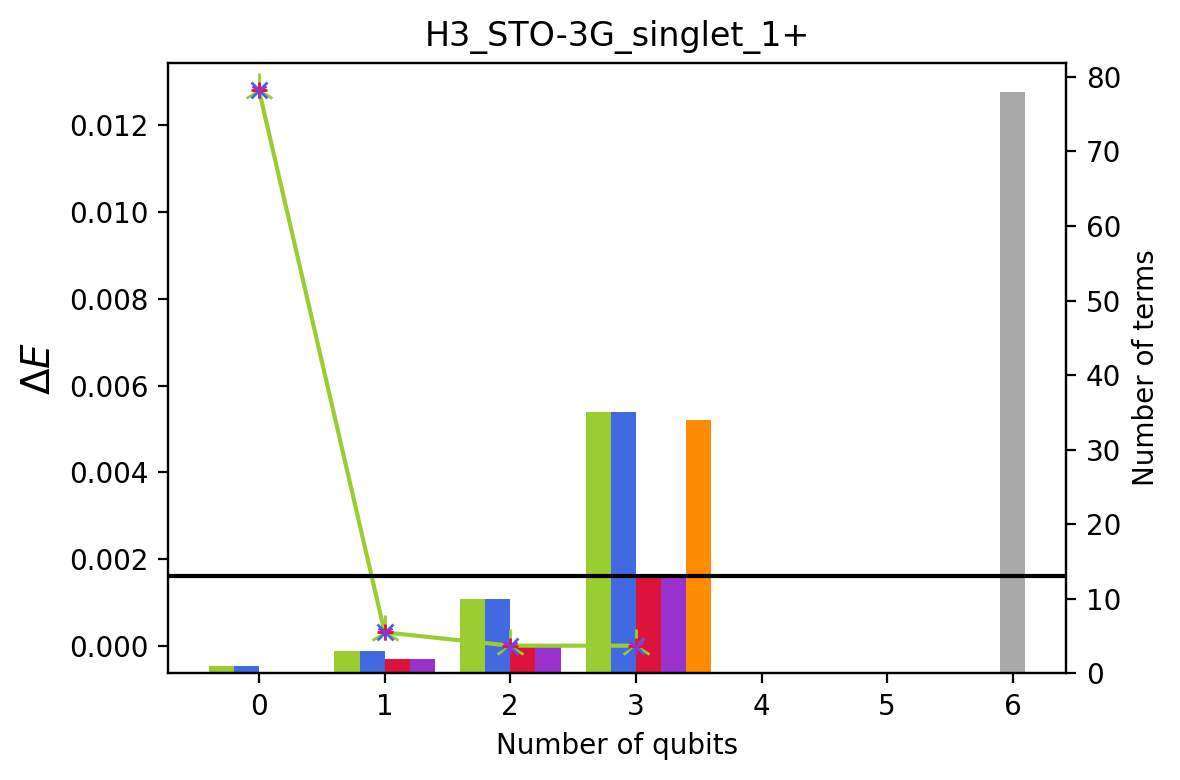

In [66]:
# calc still running on supercomputer! 
plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                       tapered_H_size_qubits, 
                       myriad_CS_VQE_LCU_results,
                       myriad_CS_VQE_SeqRot_results,
                       myriad_UP_LCU_on_CSVQE_LCU,
                       myriad_UP_SeqRot_on_CSVQE_SeqRot,
                       'H3_STO-3G_singlet_1+', #'H1-F1_3-21G_singlet',
                       dpi=200)

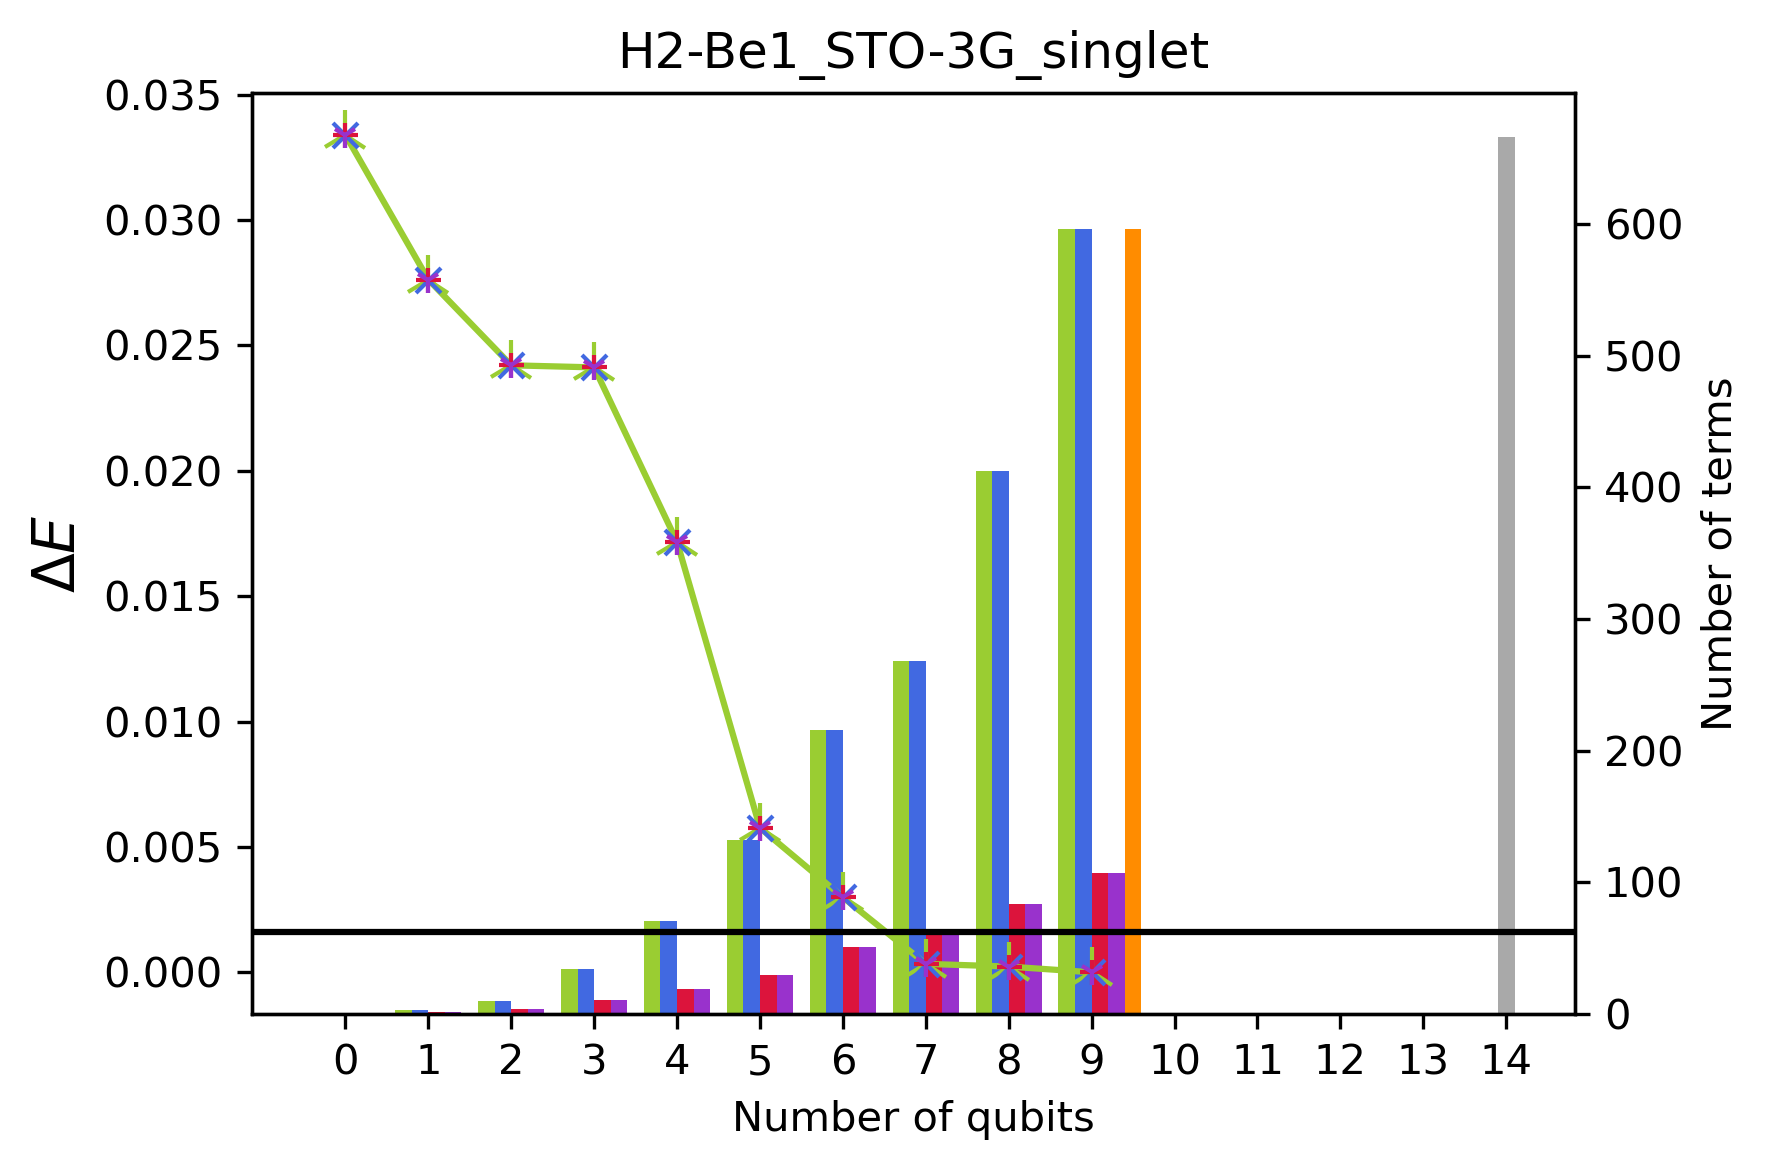

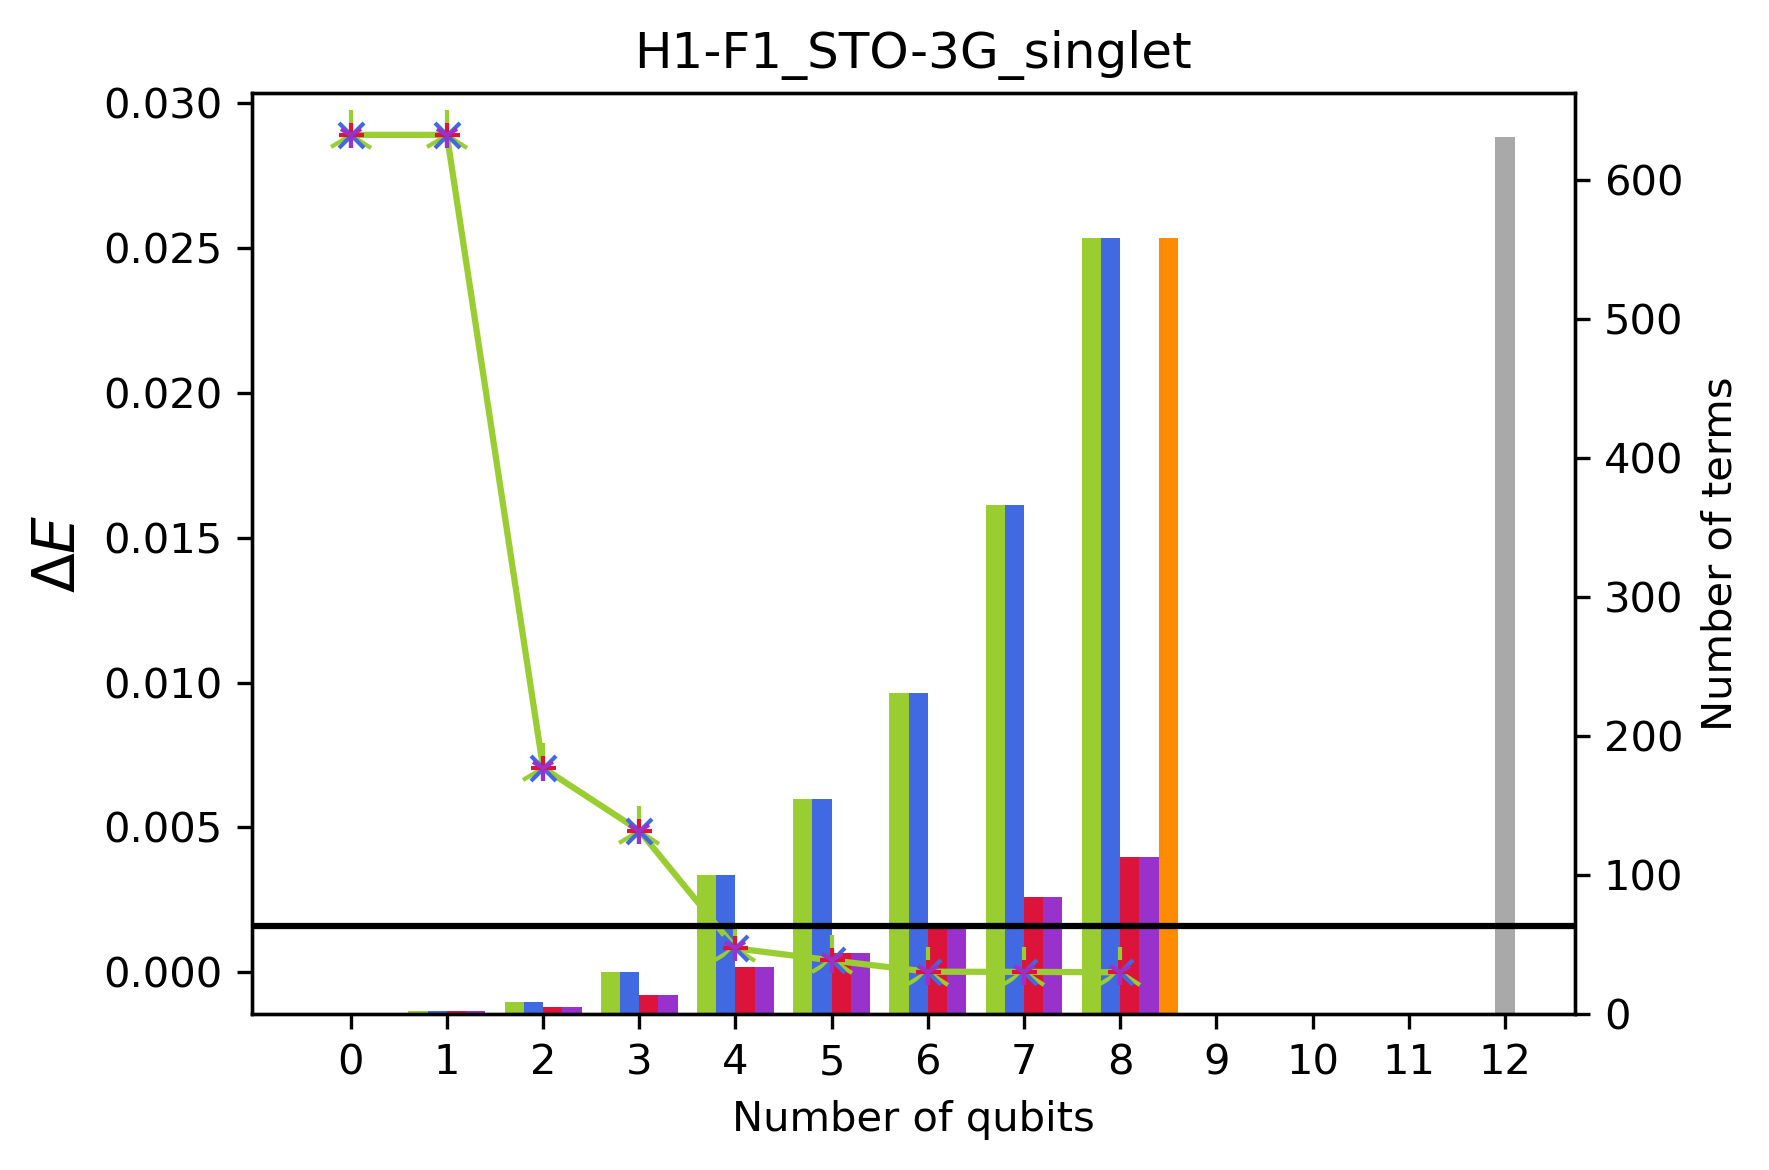

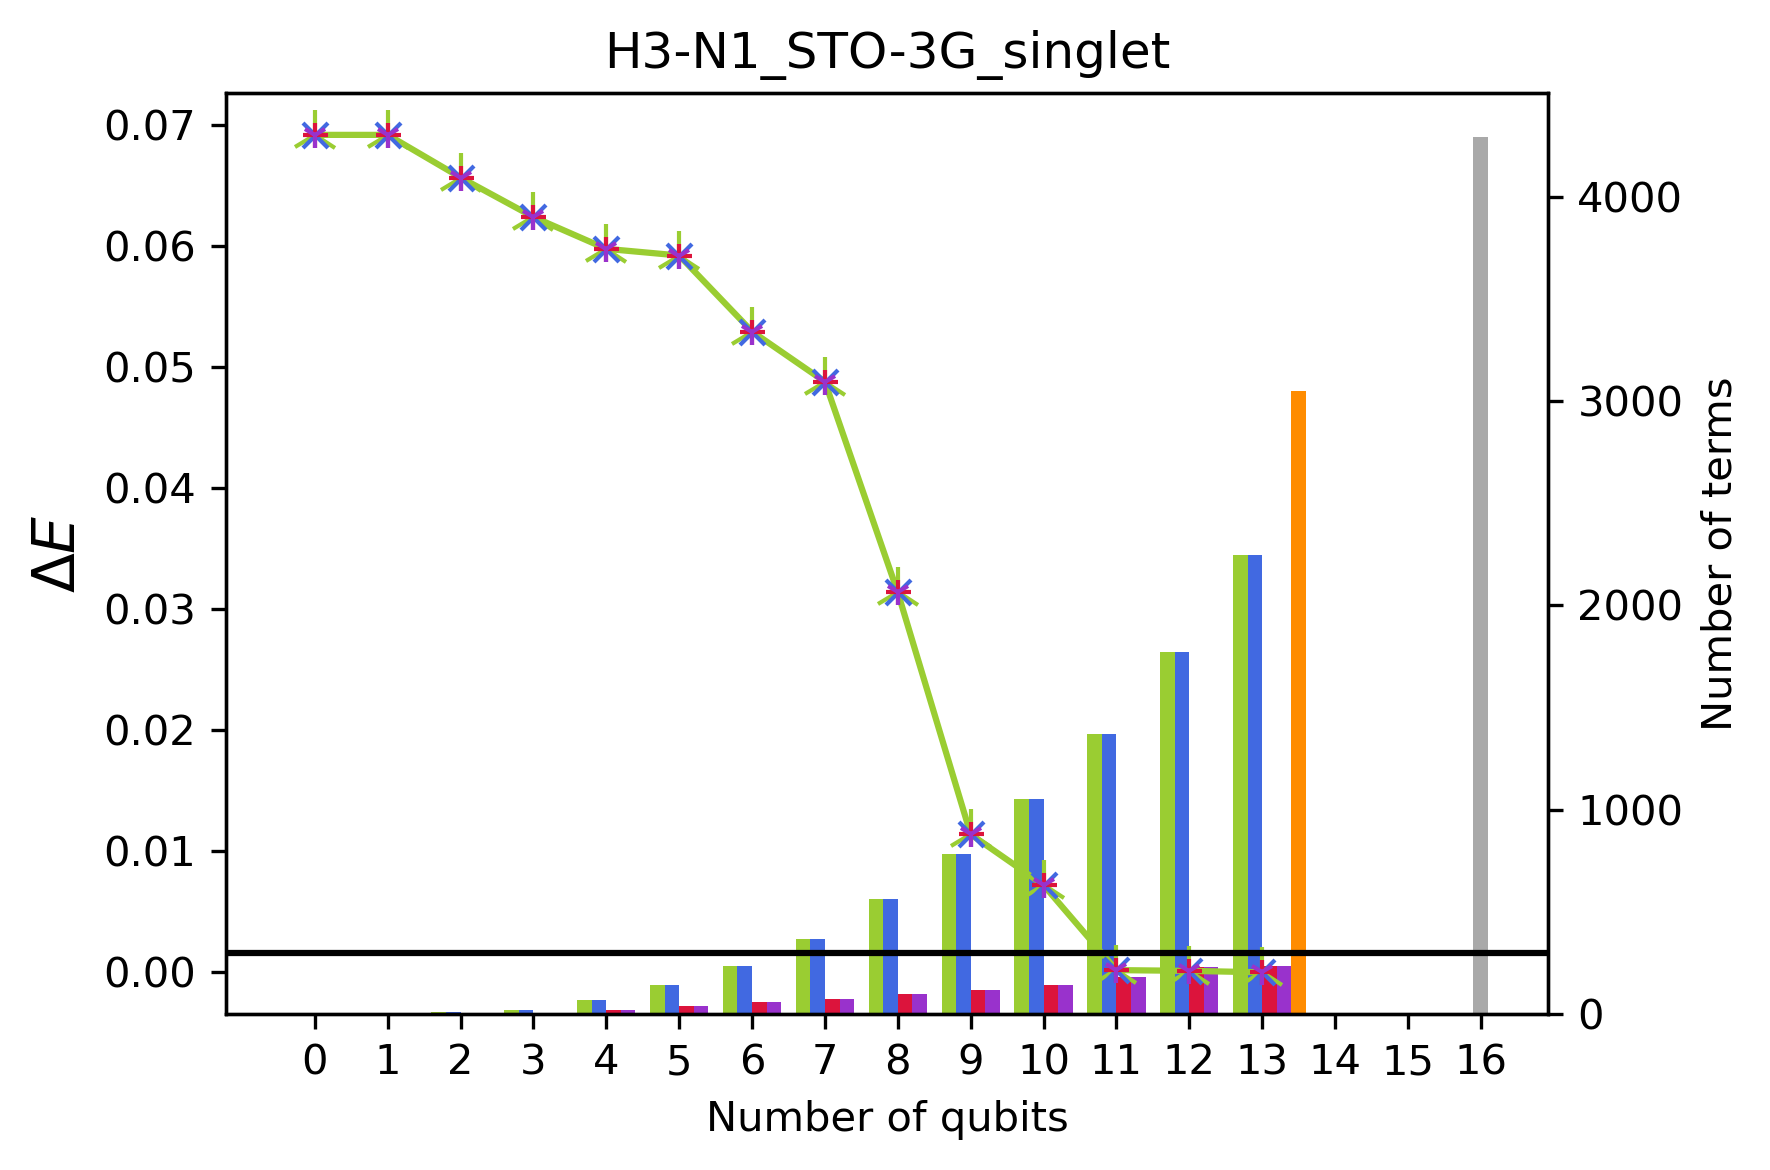

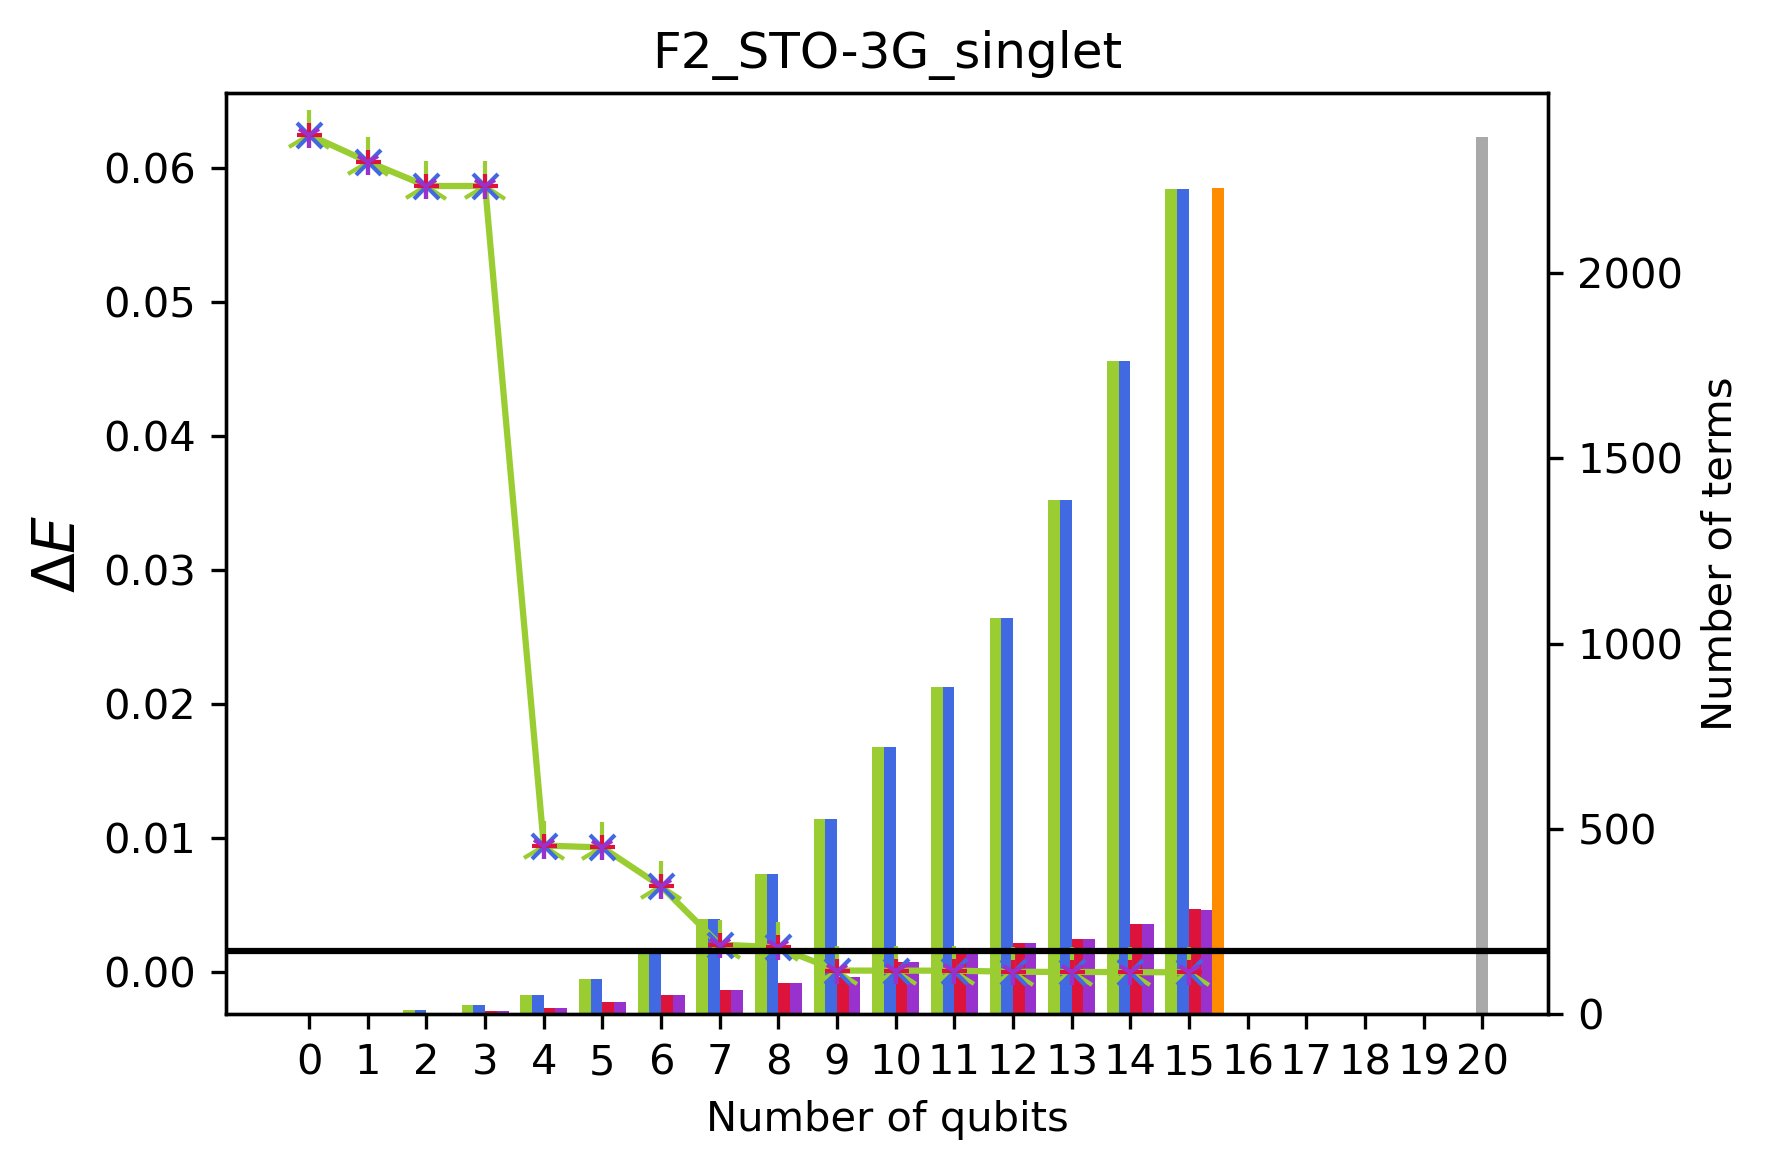

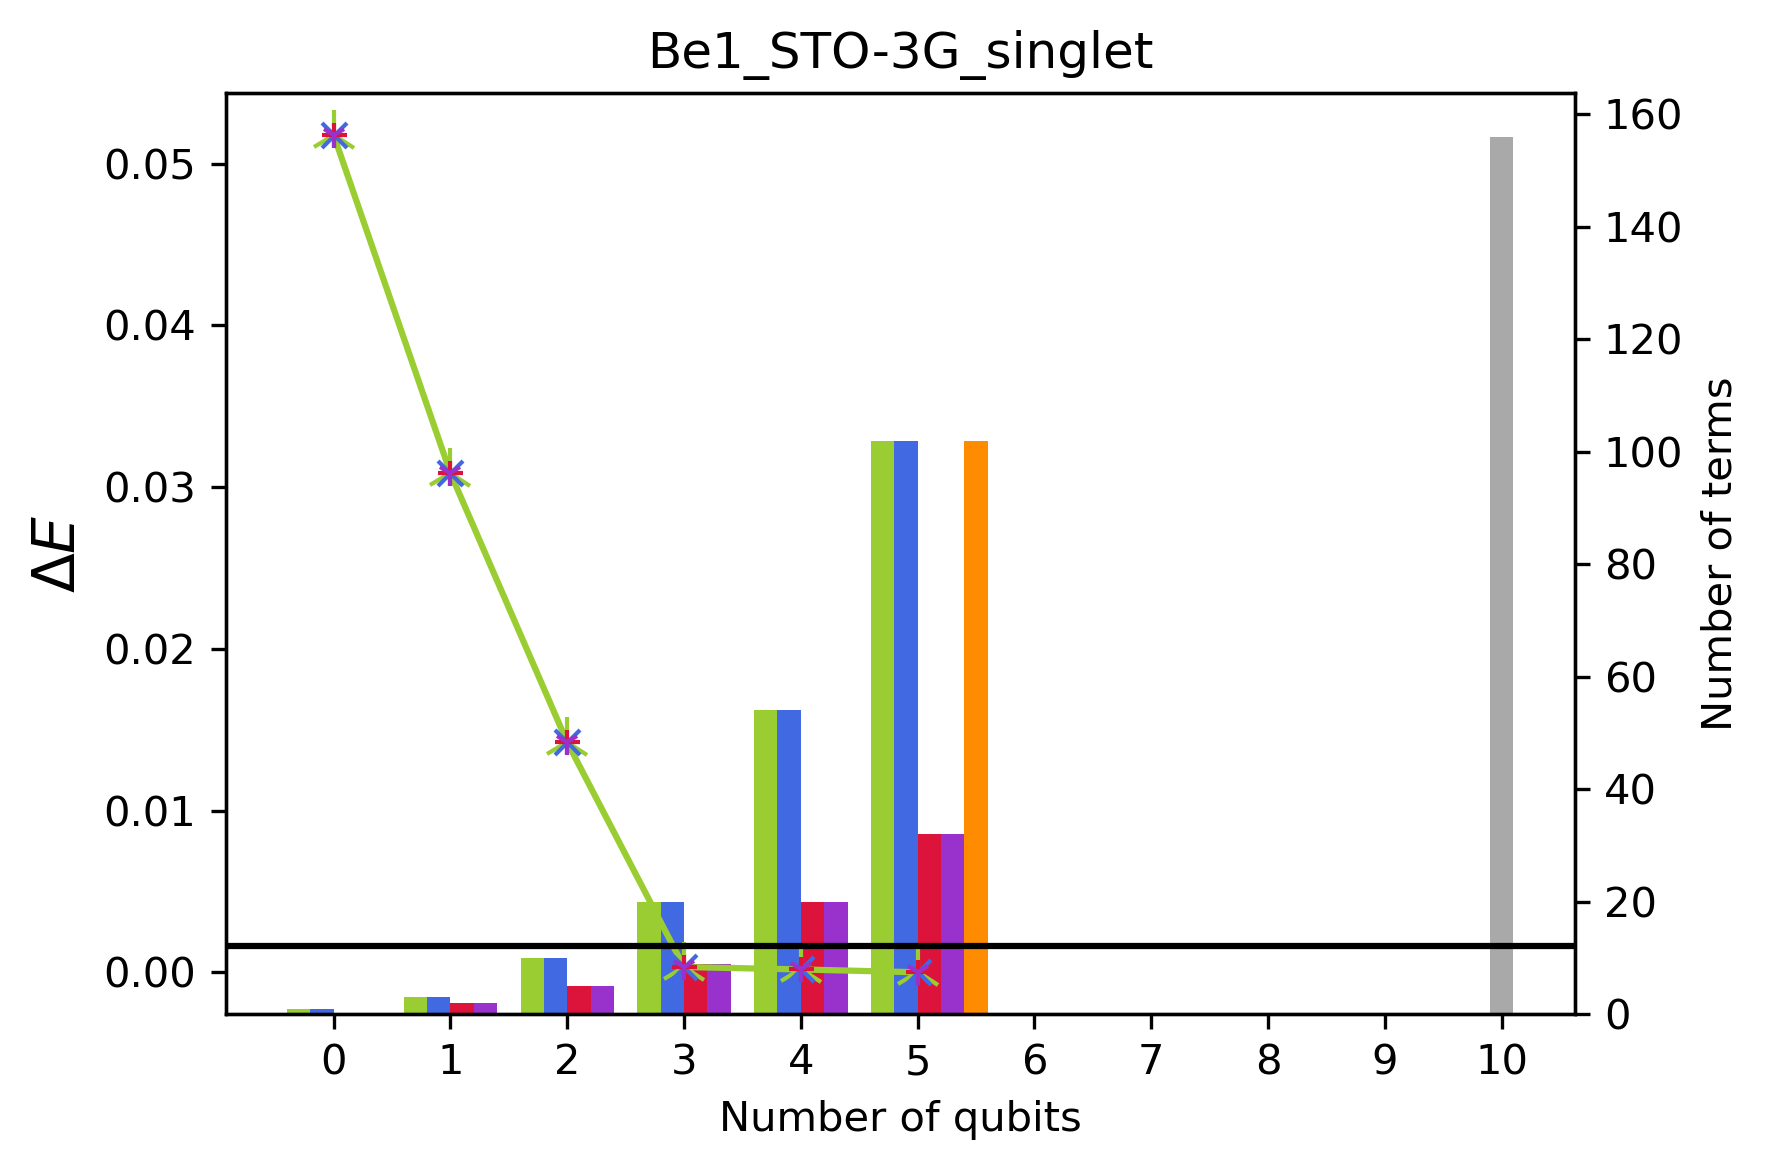

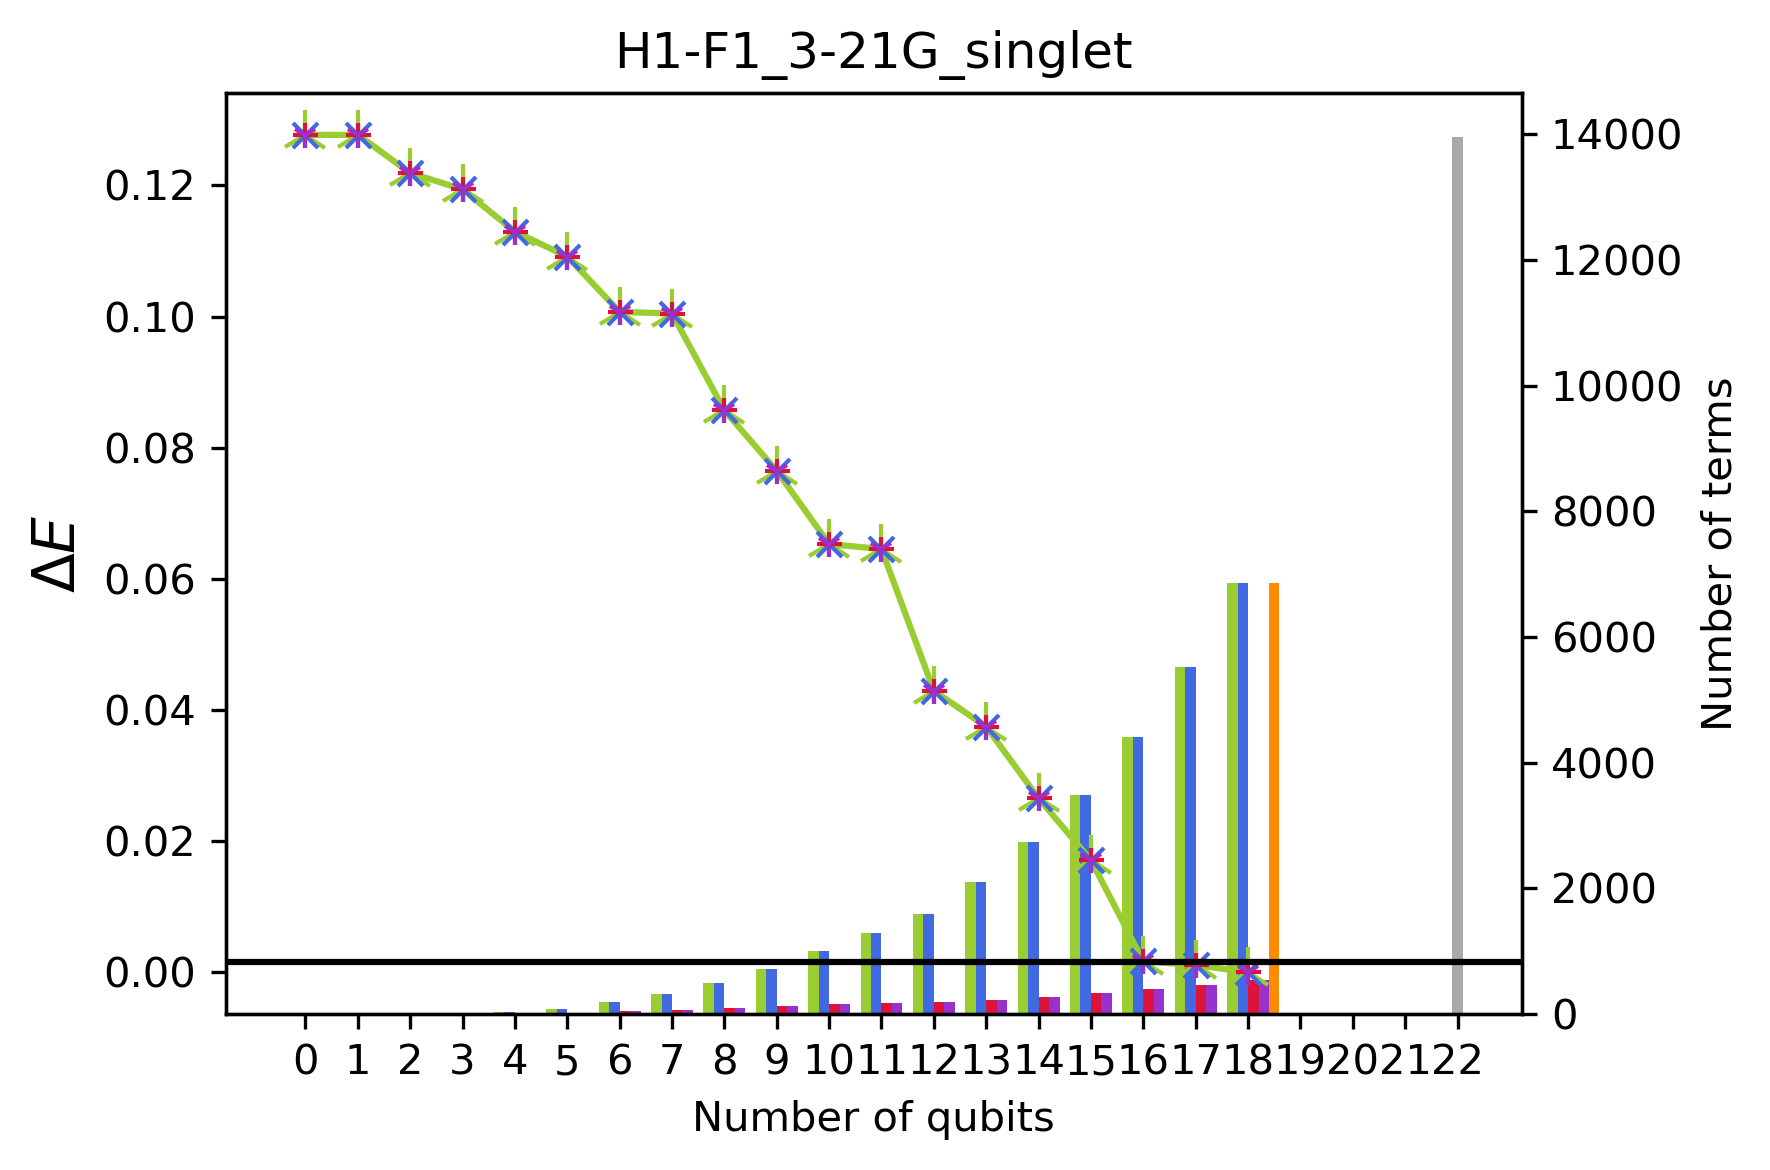

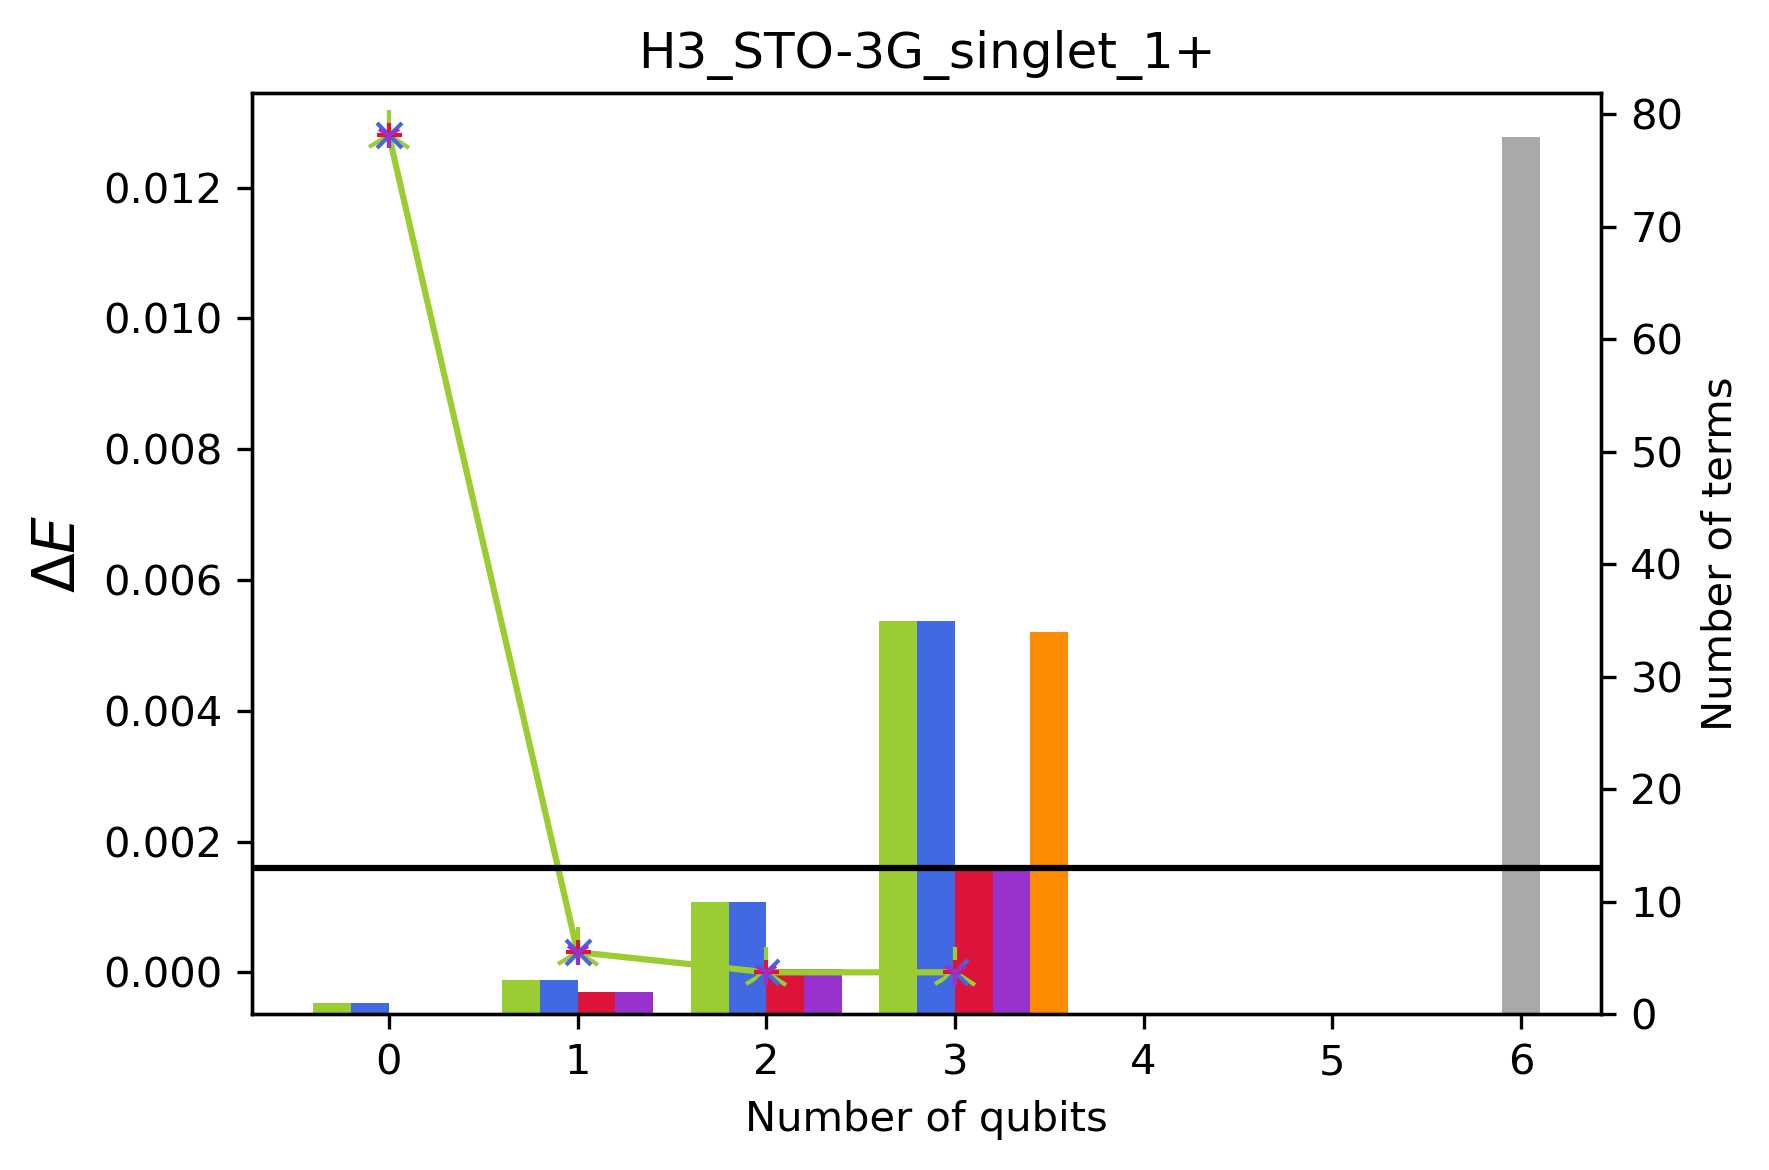

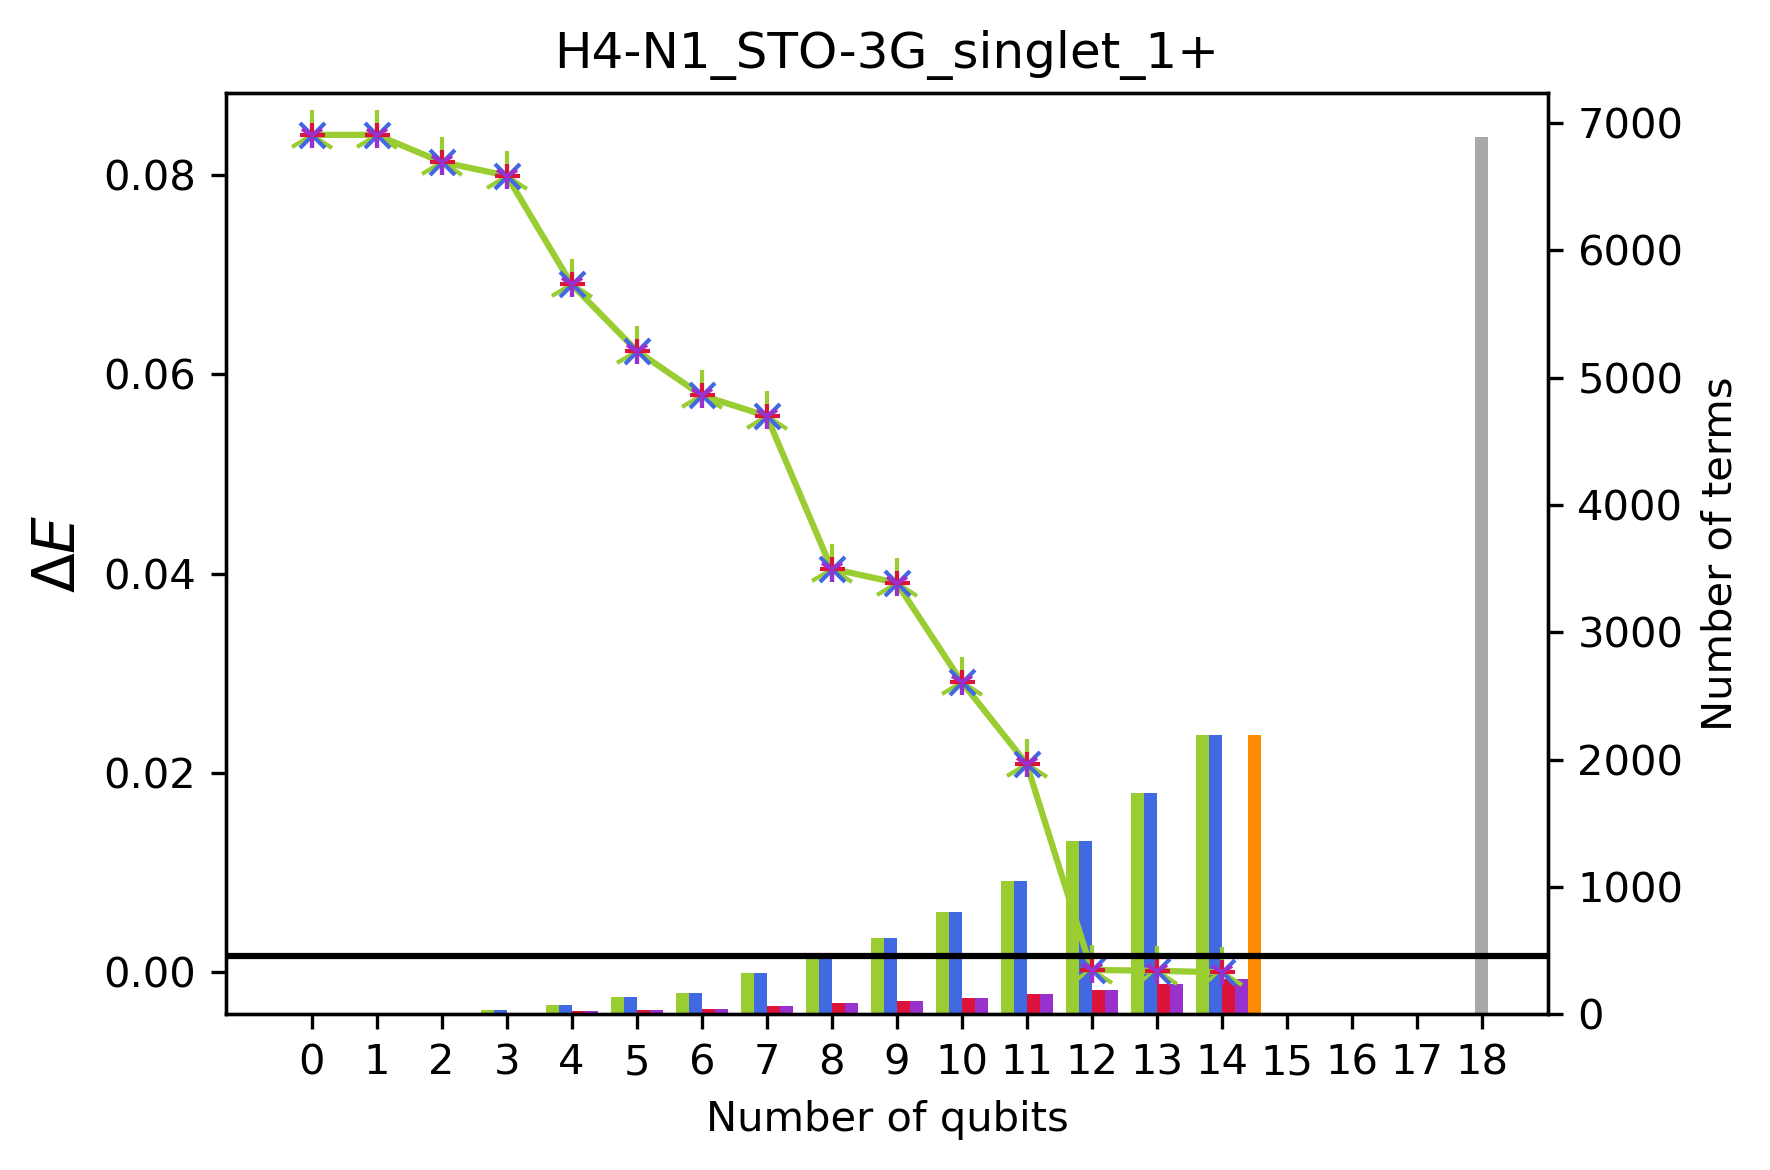

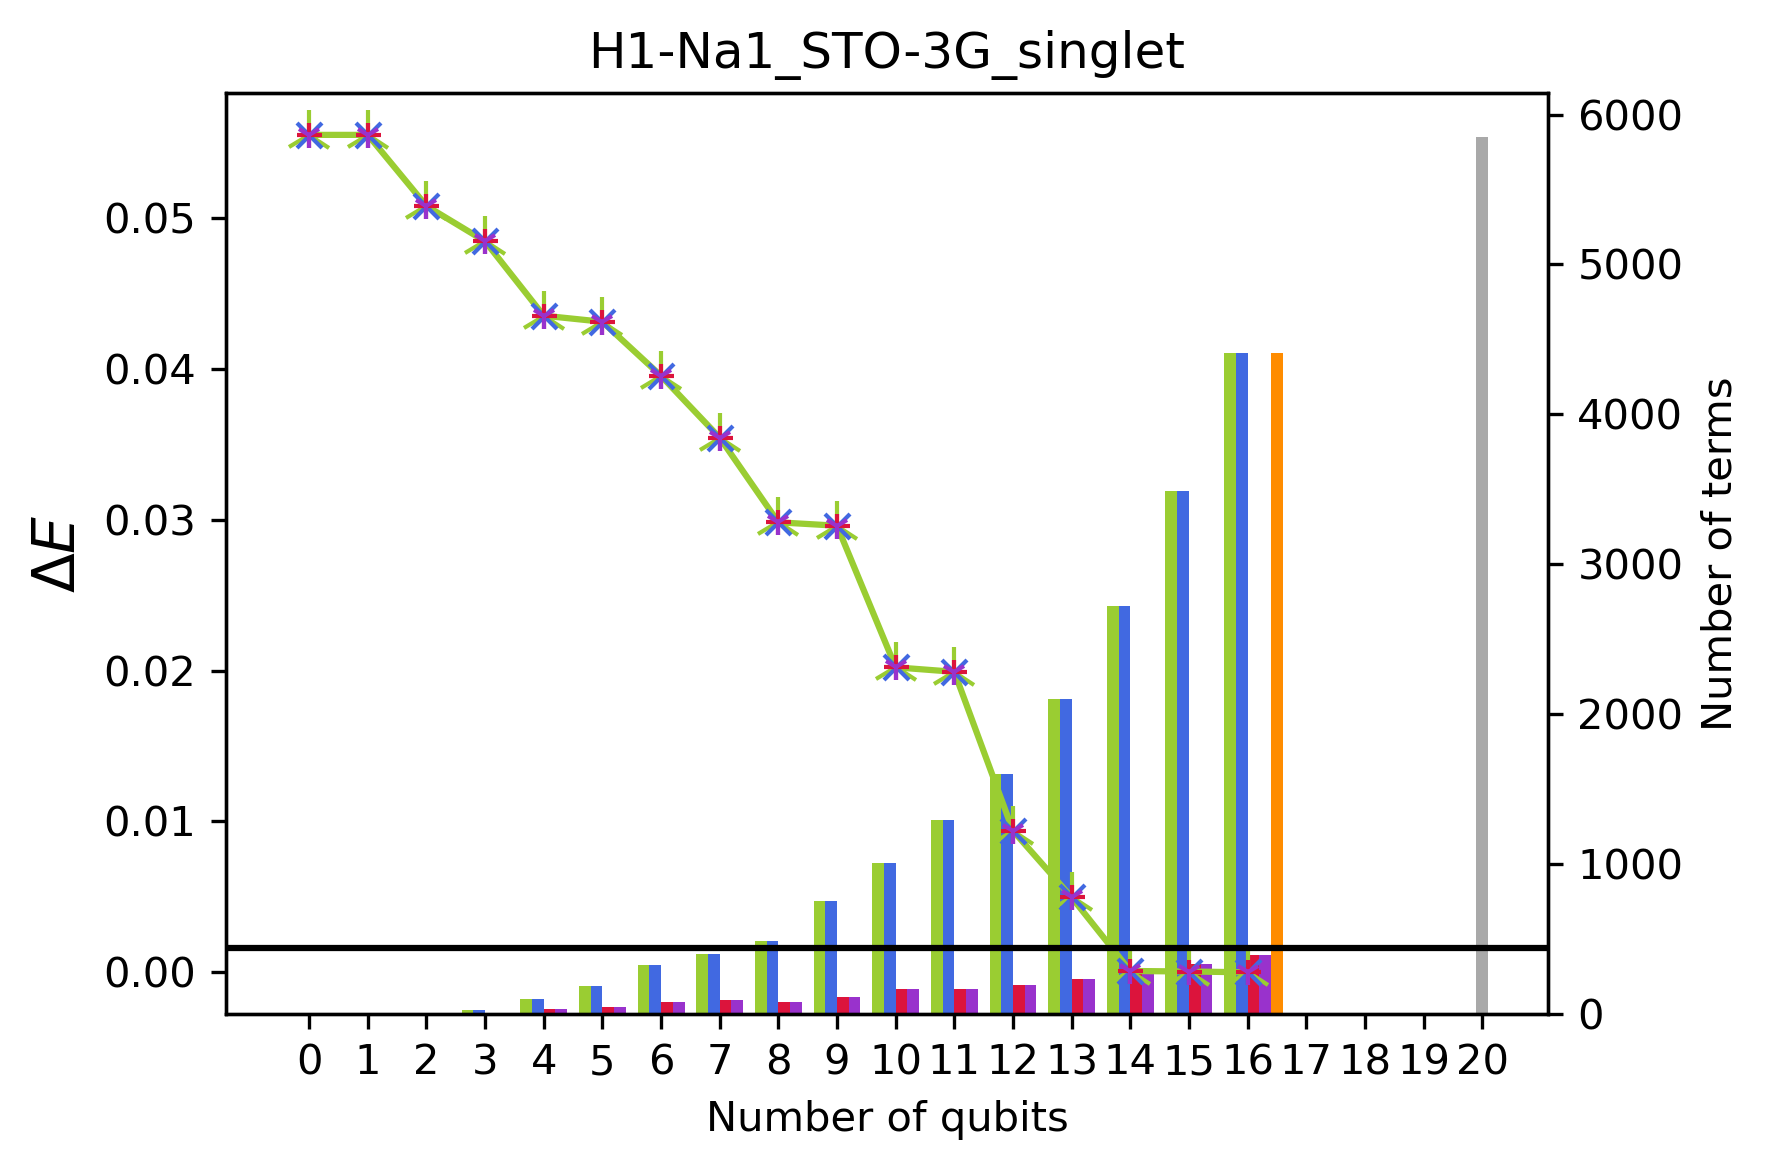

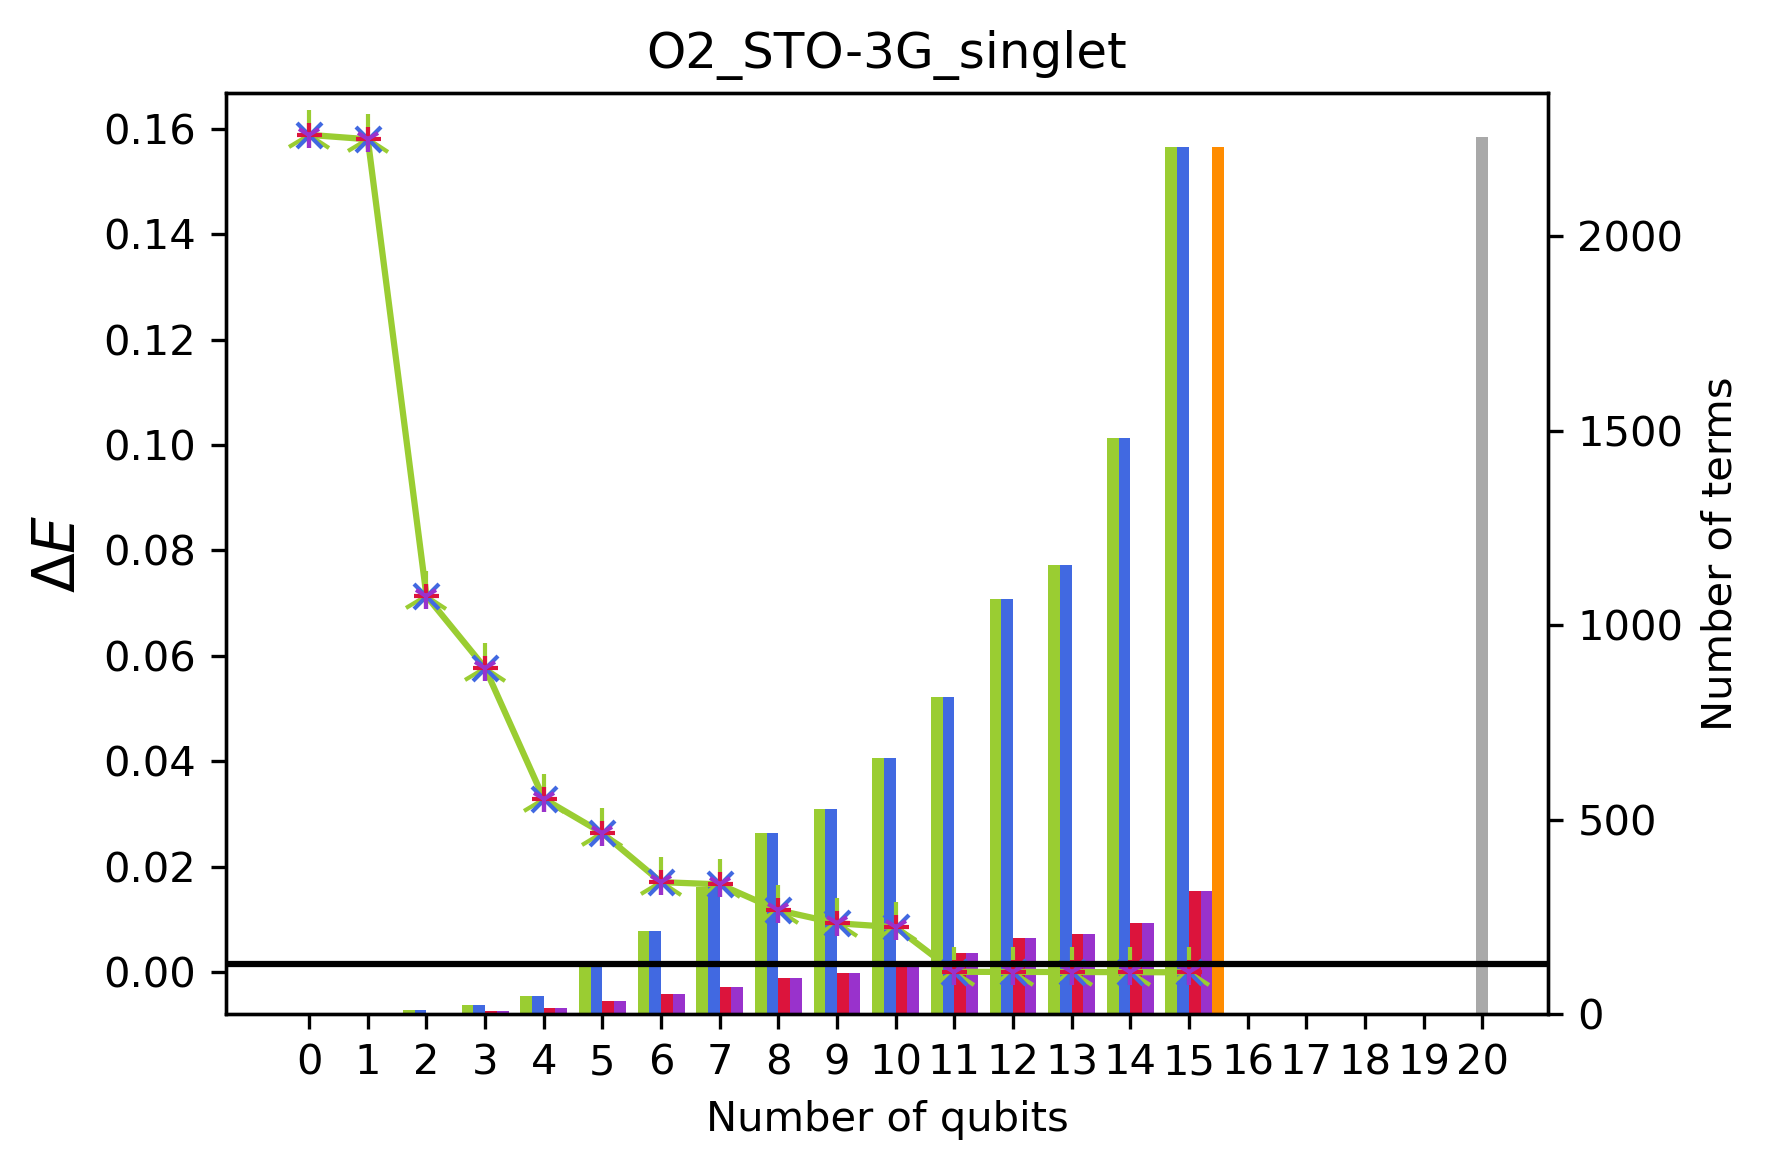

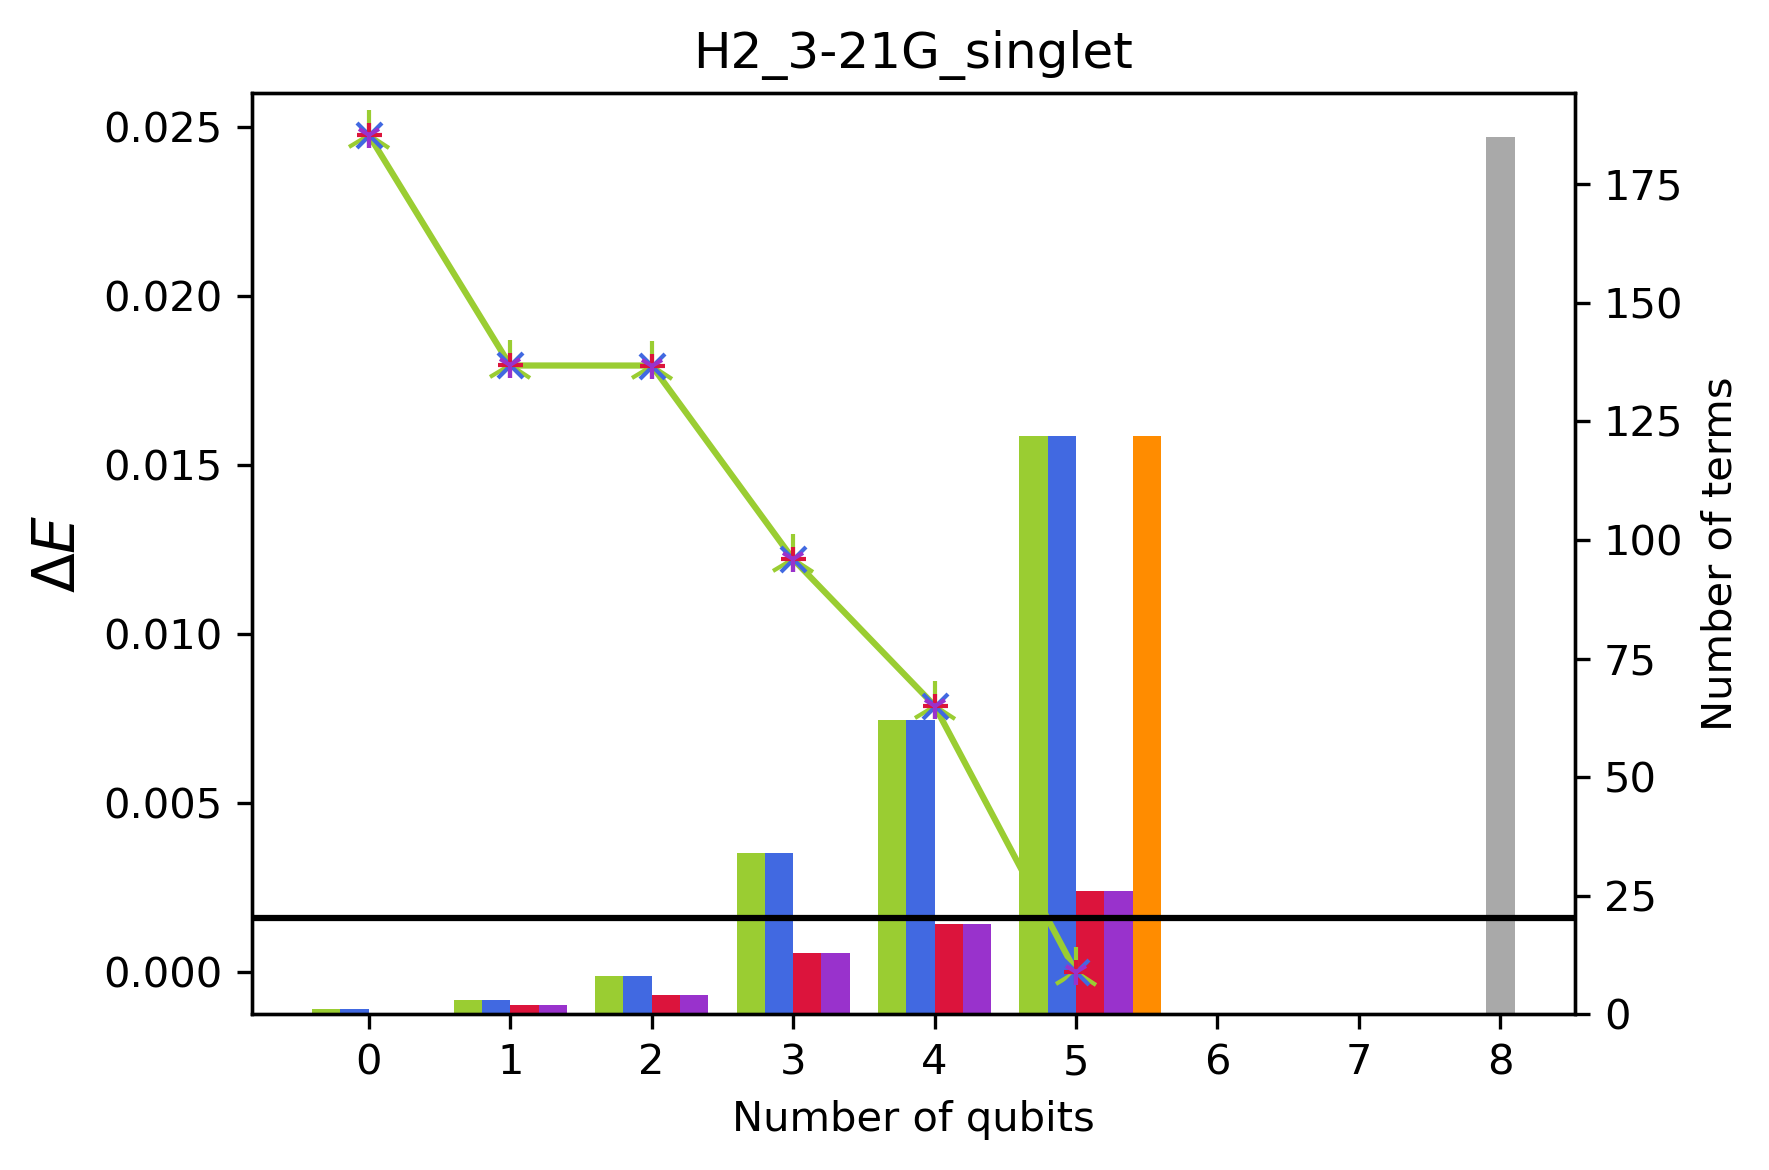

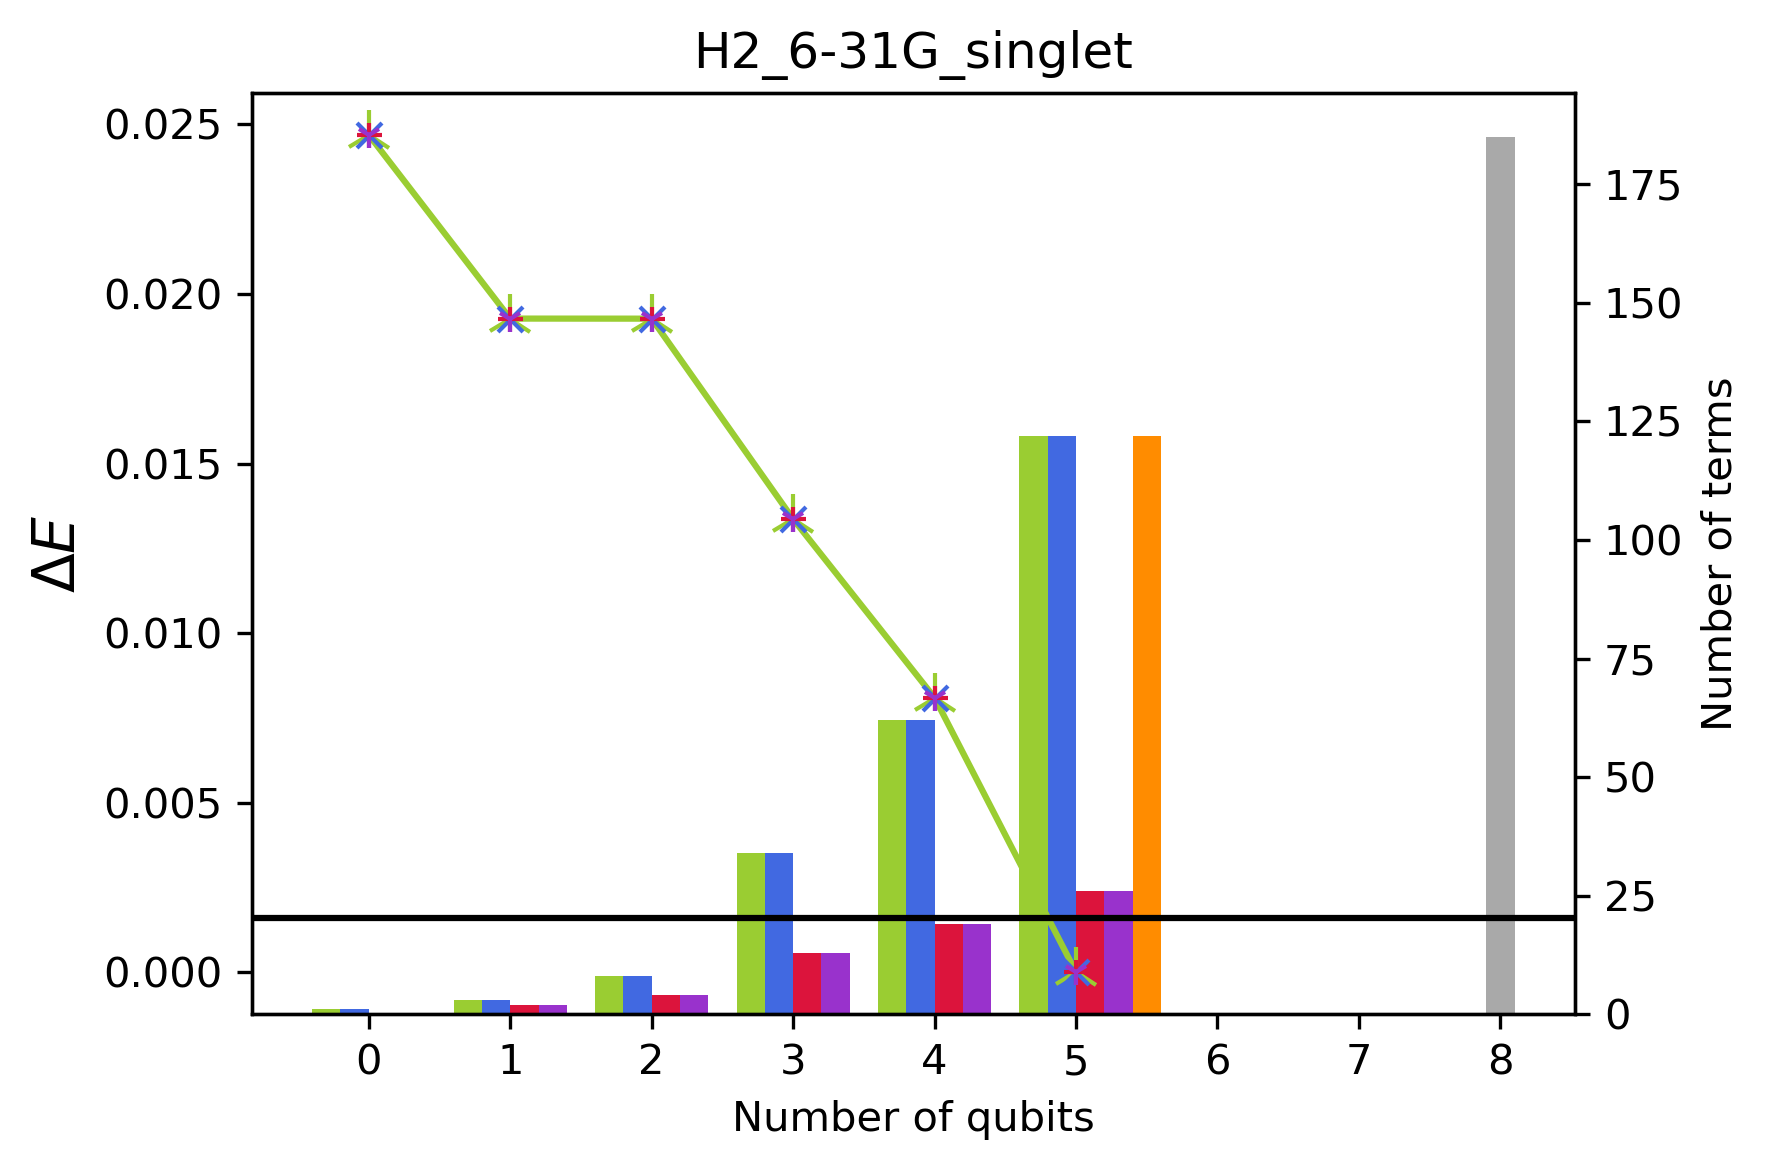

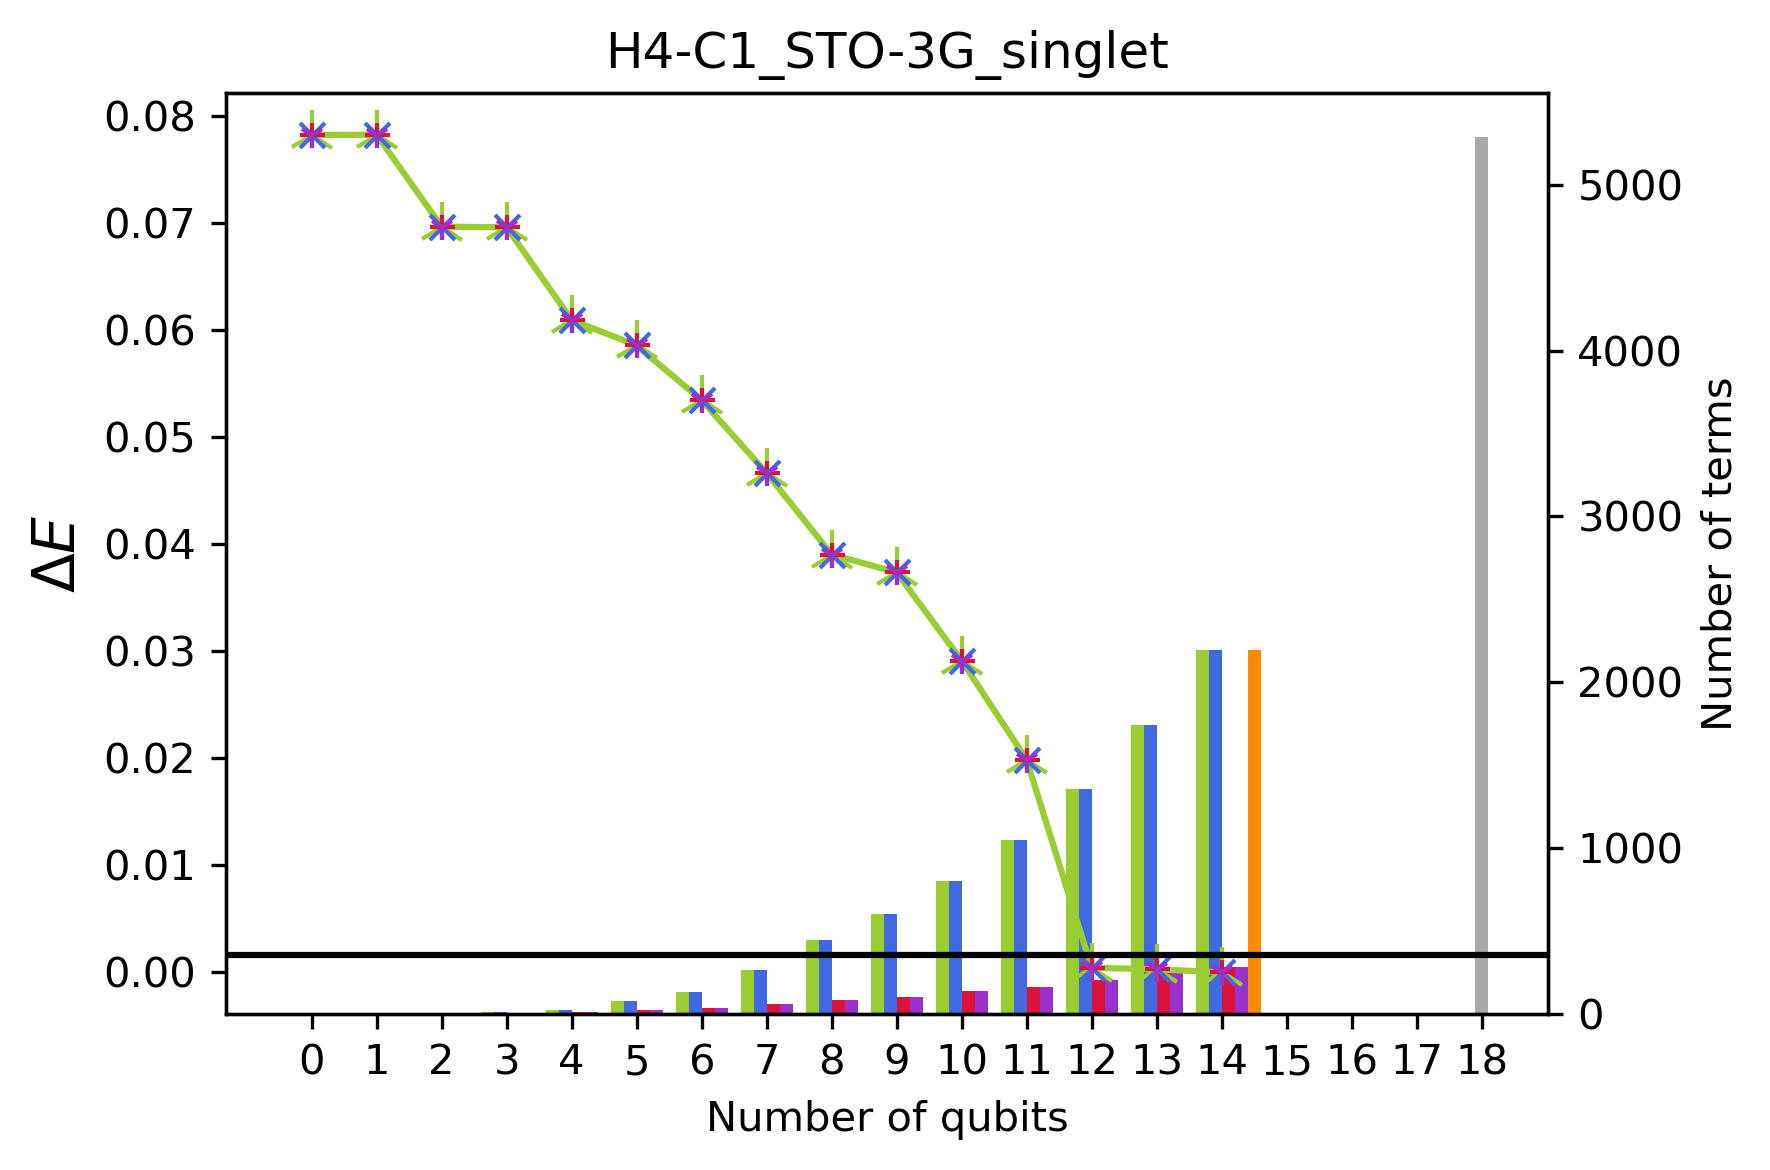

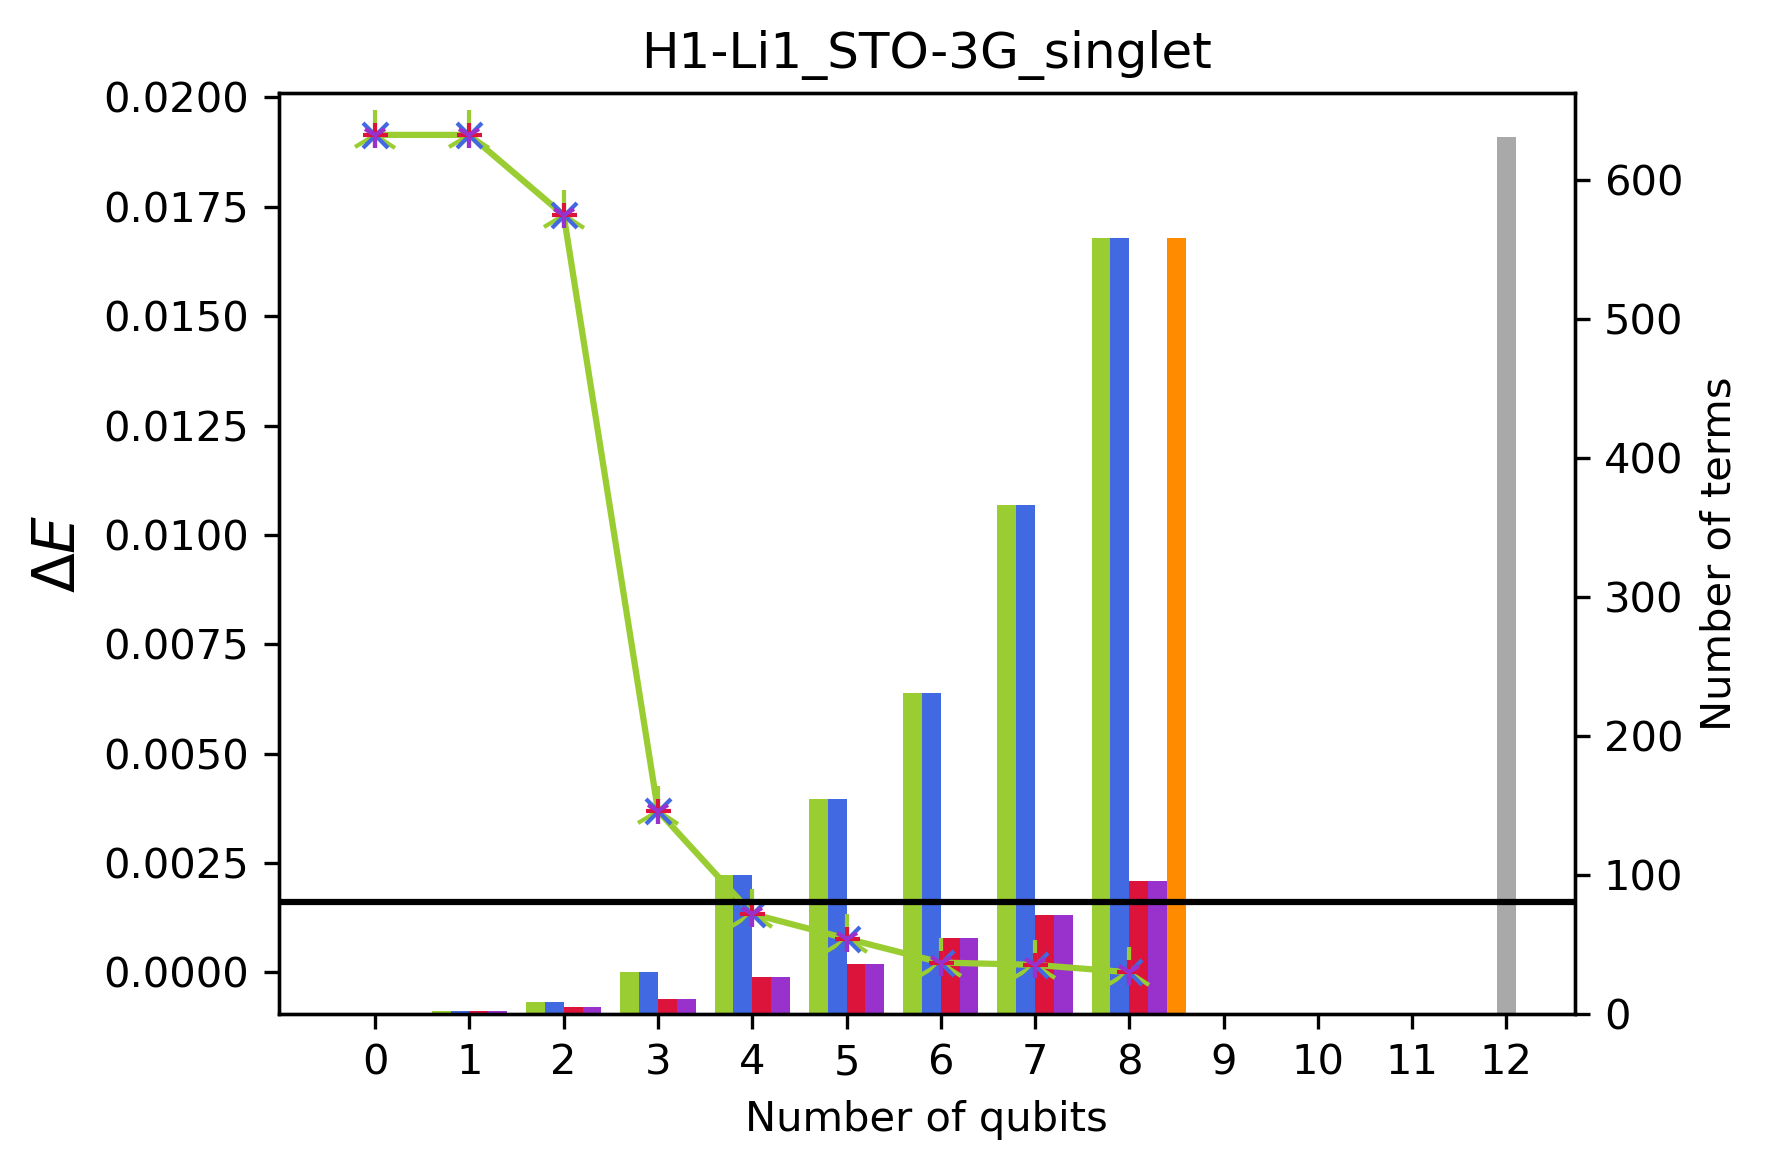

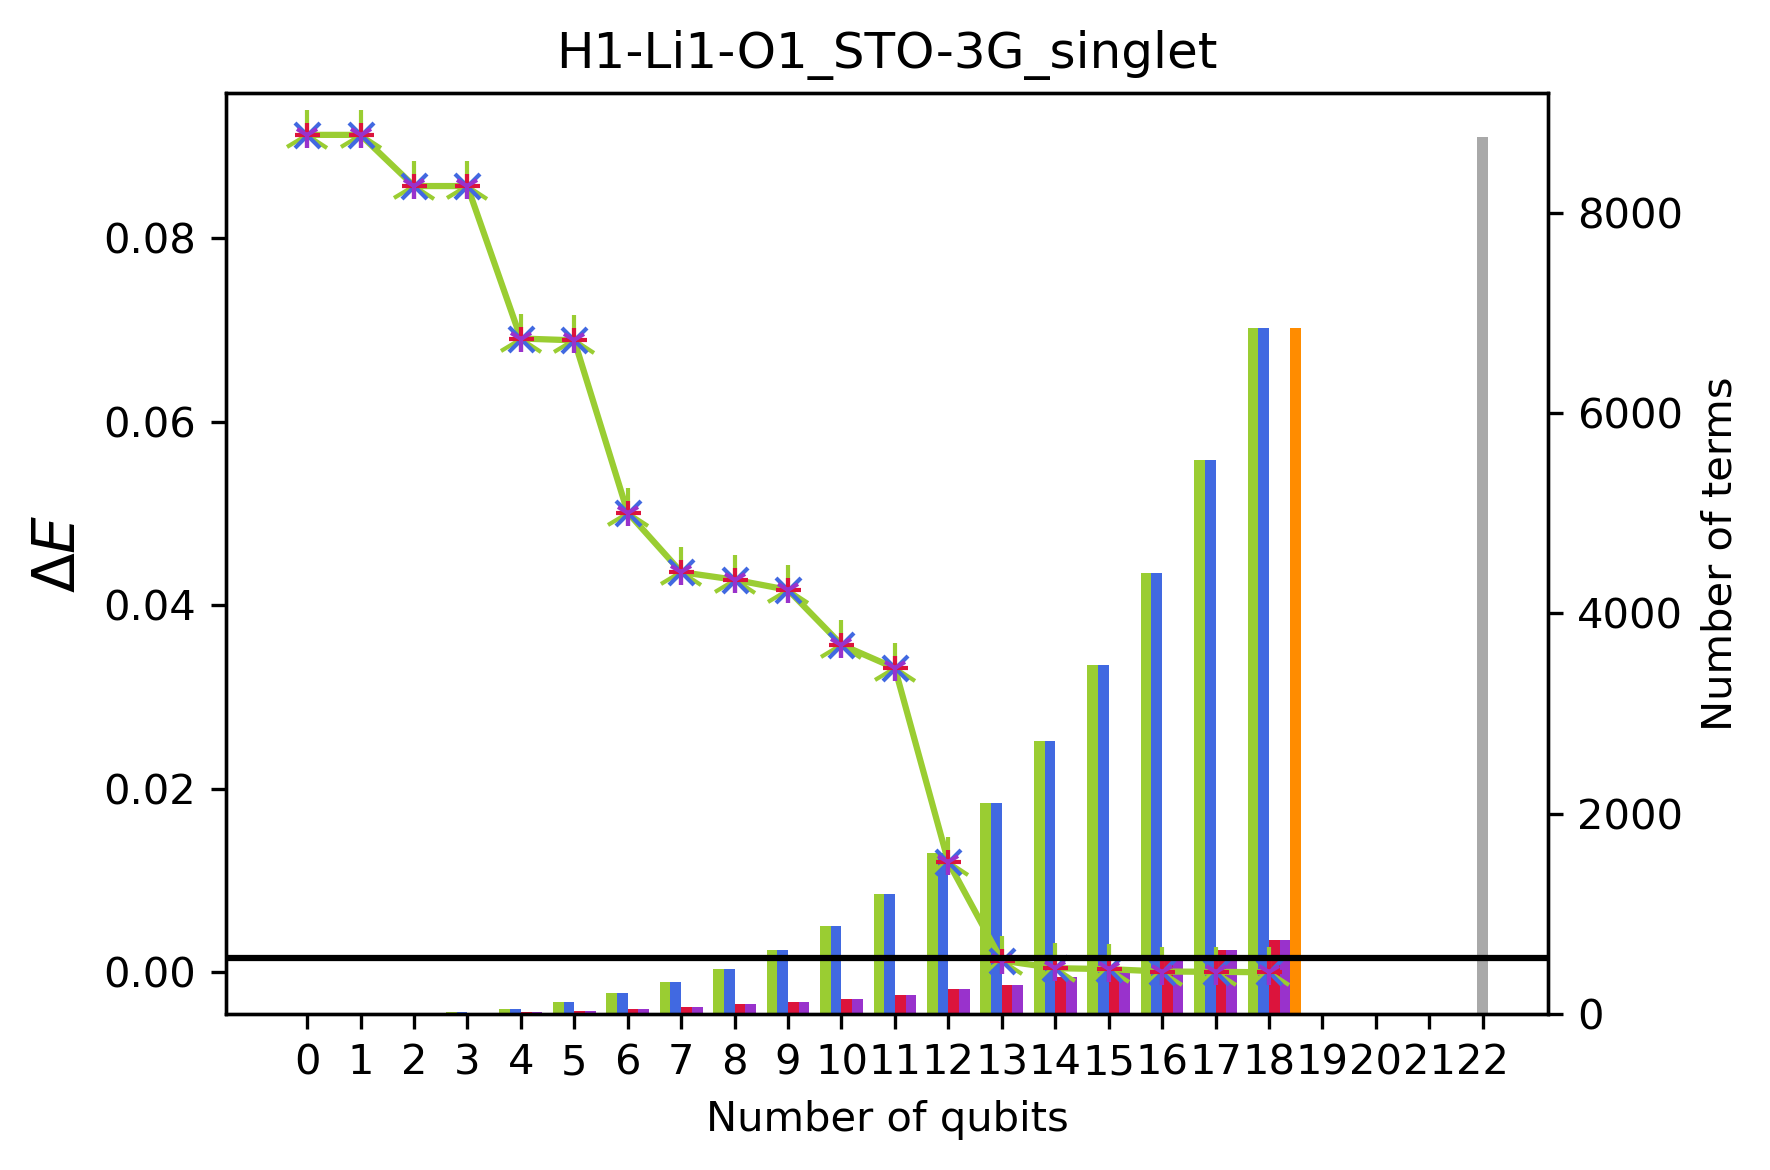

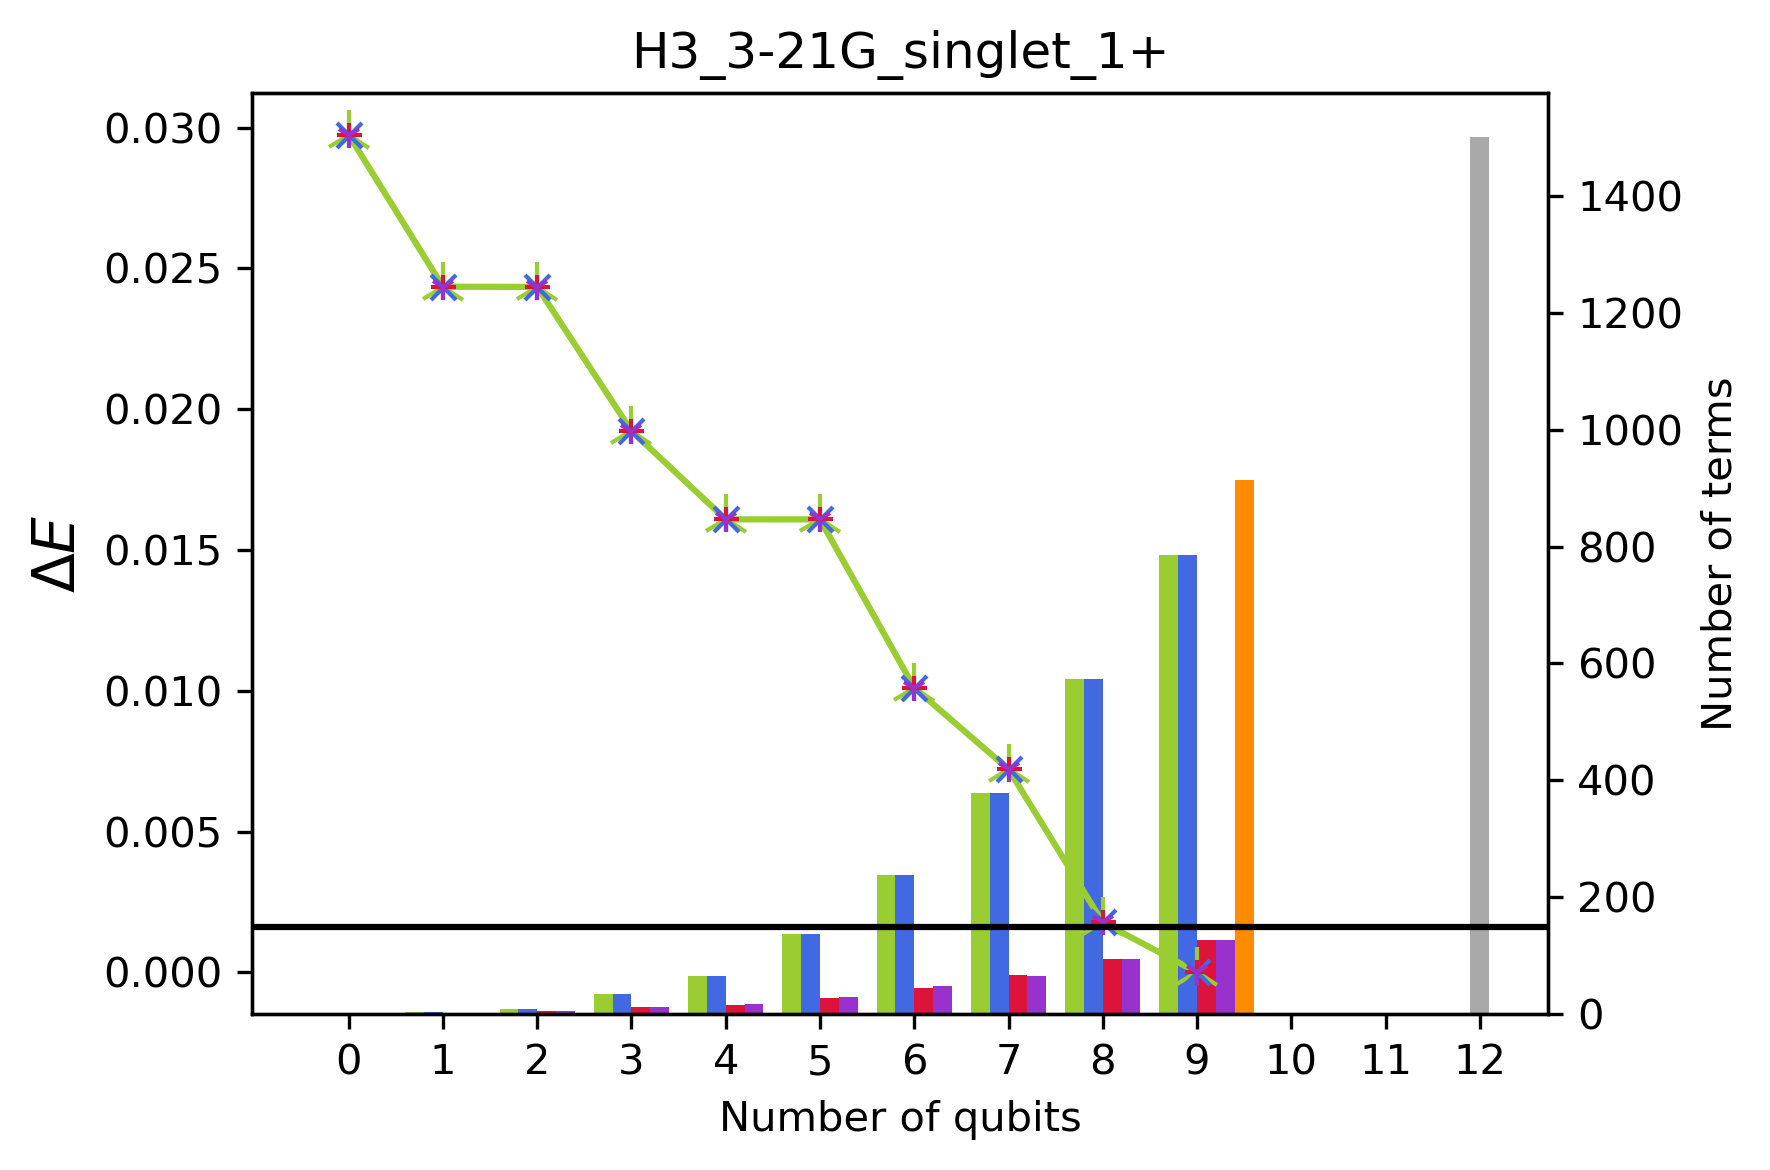

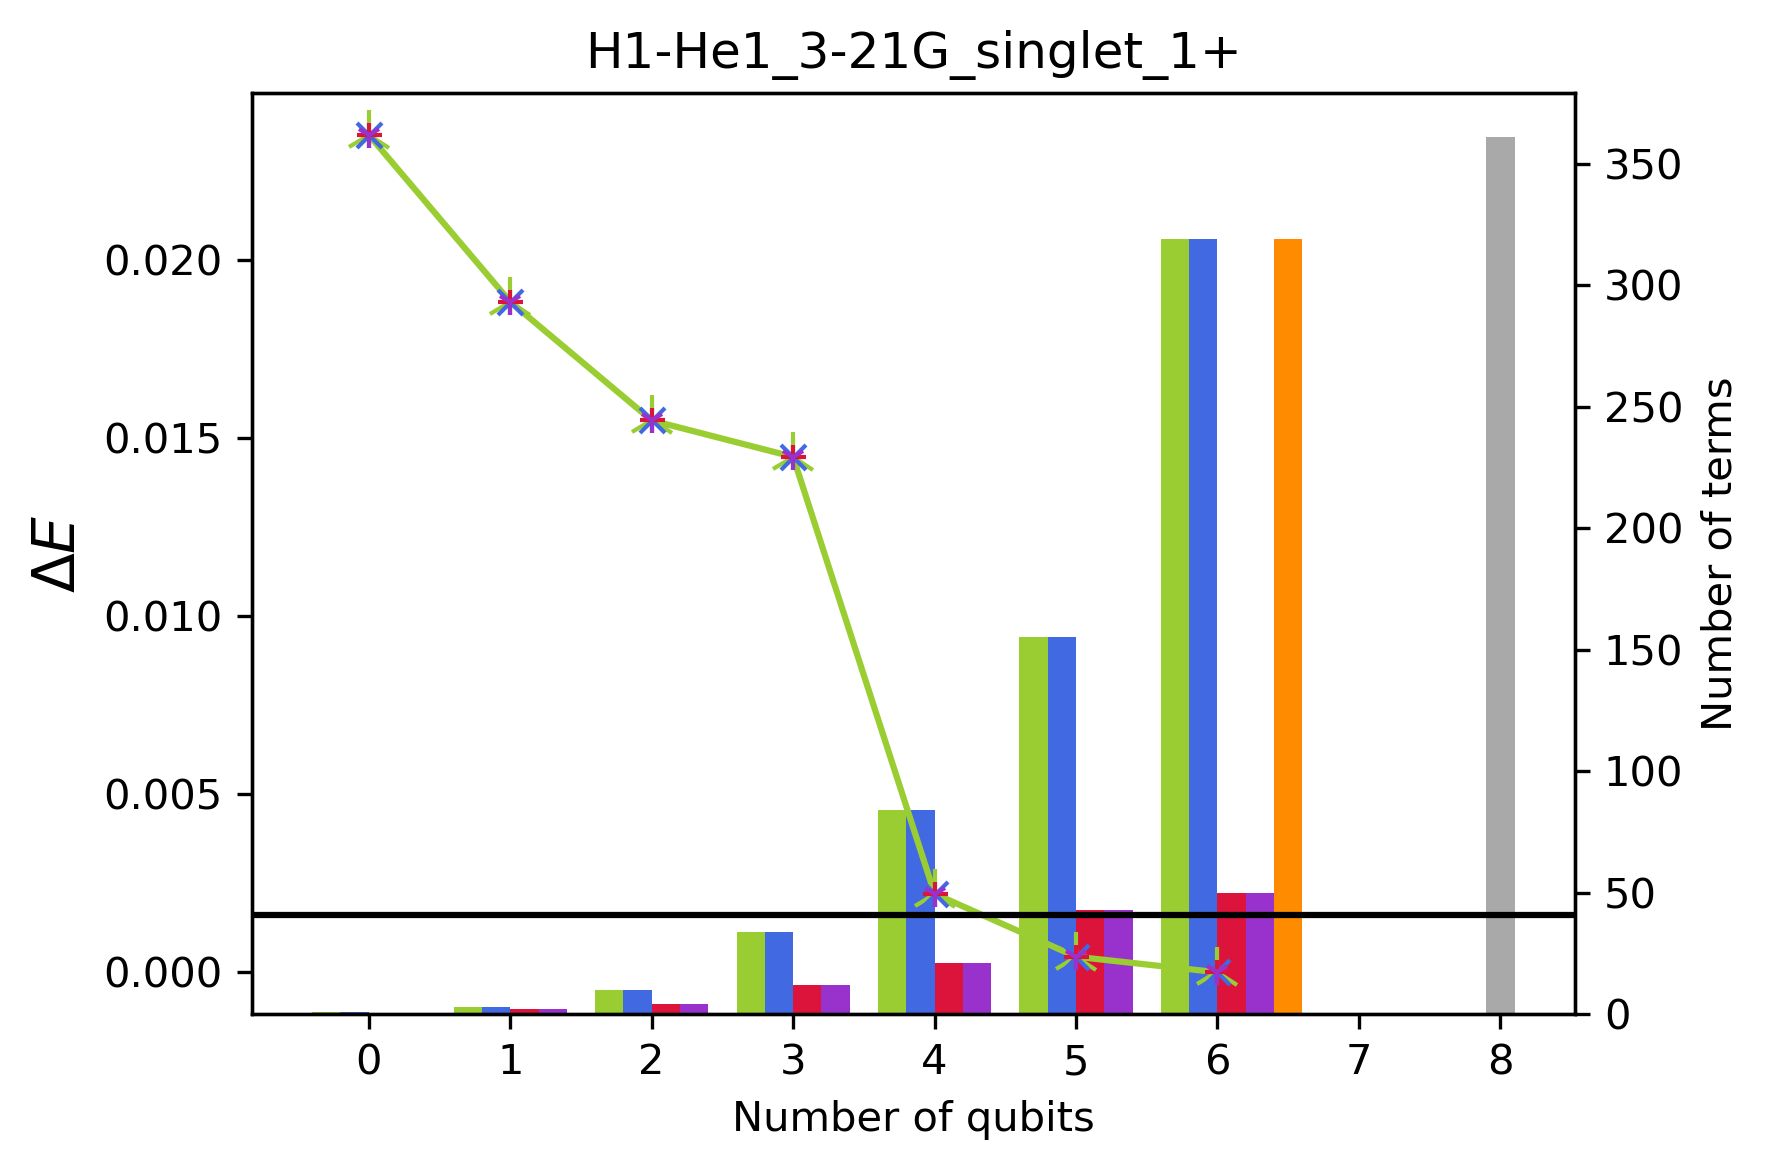

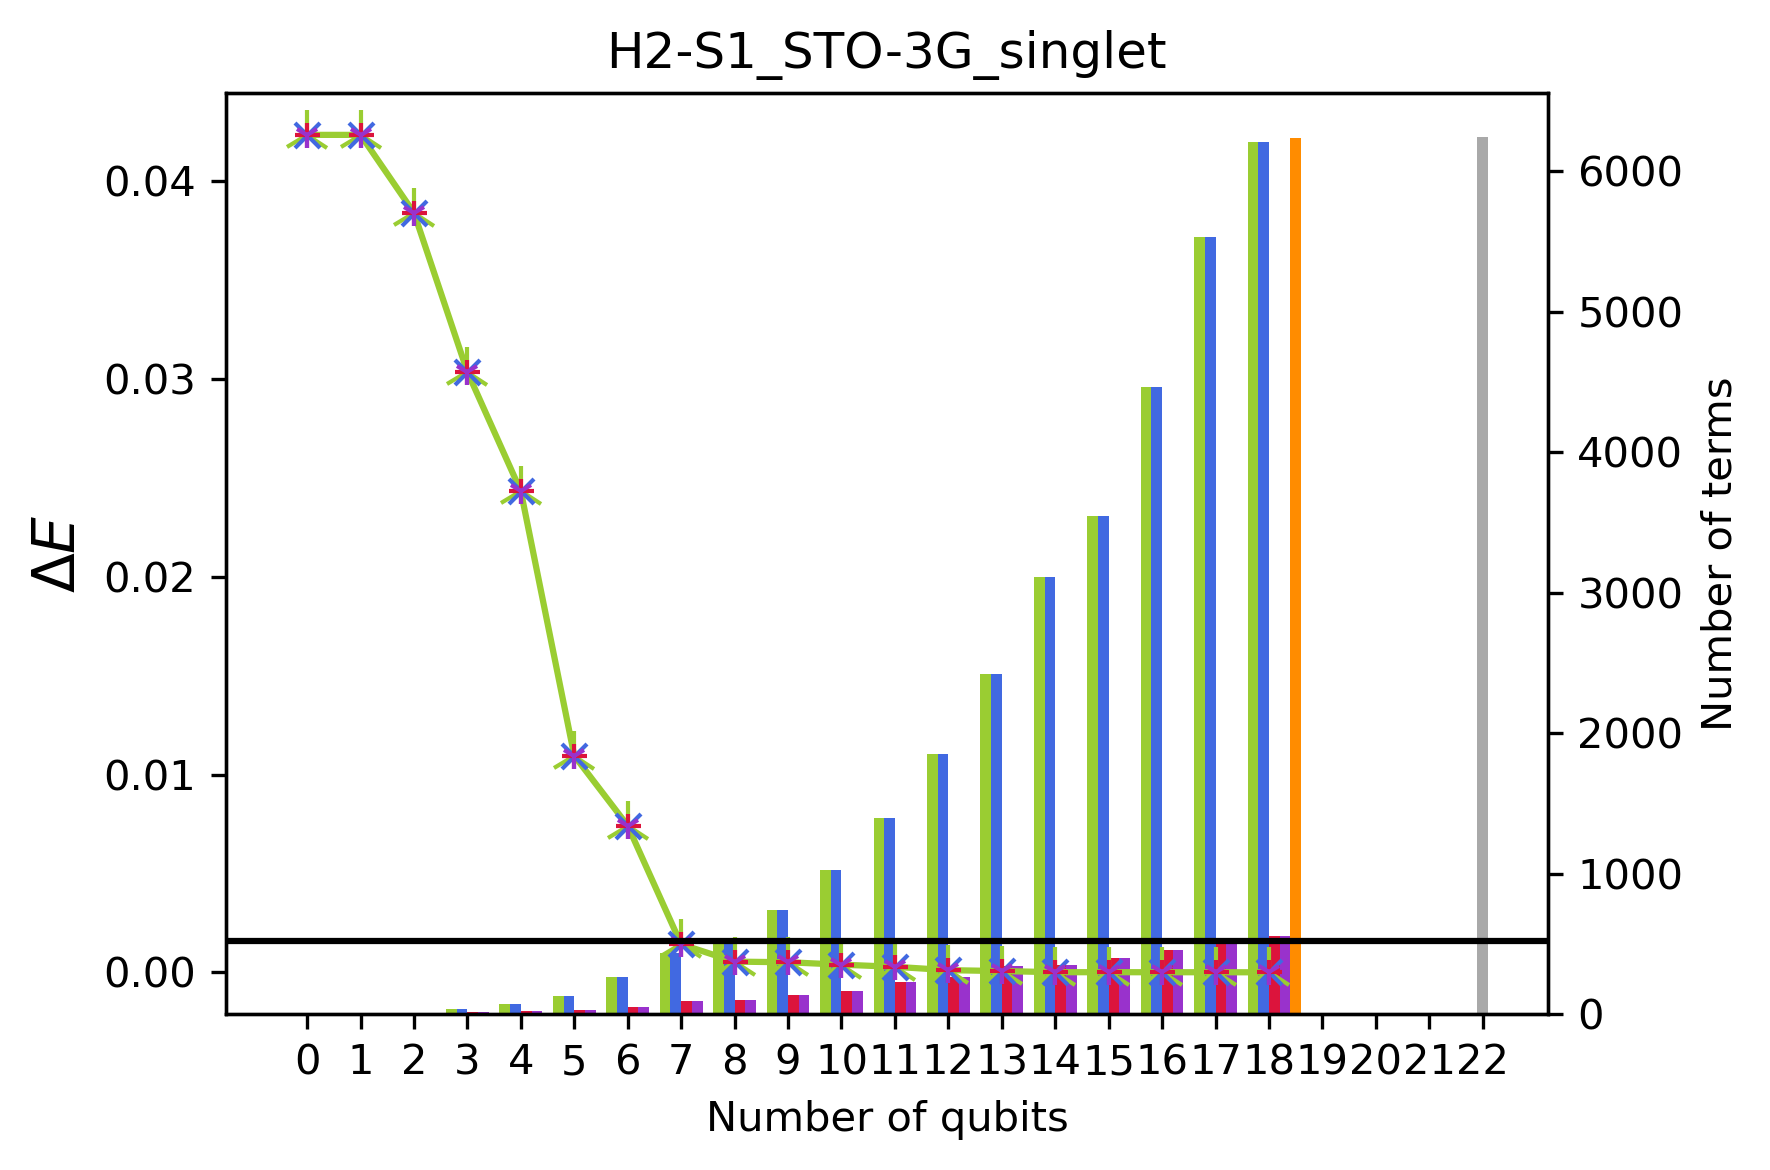

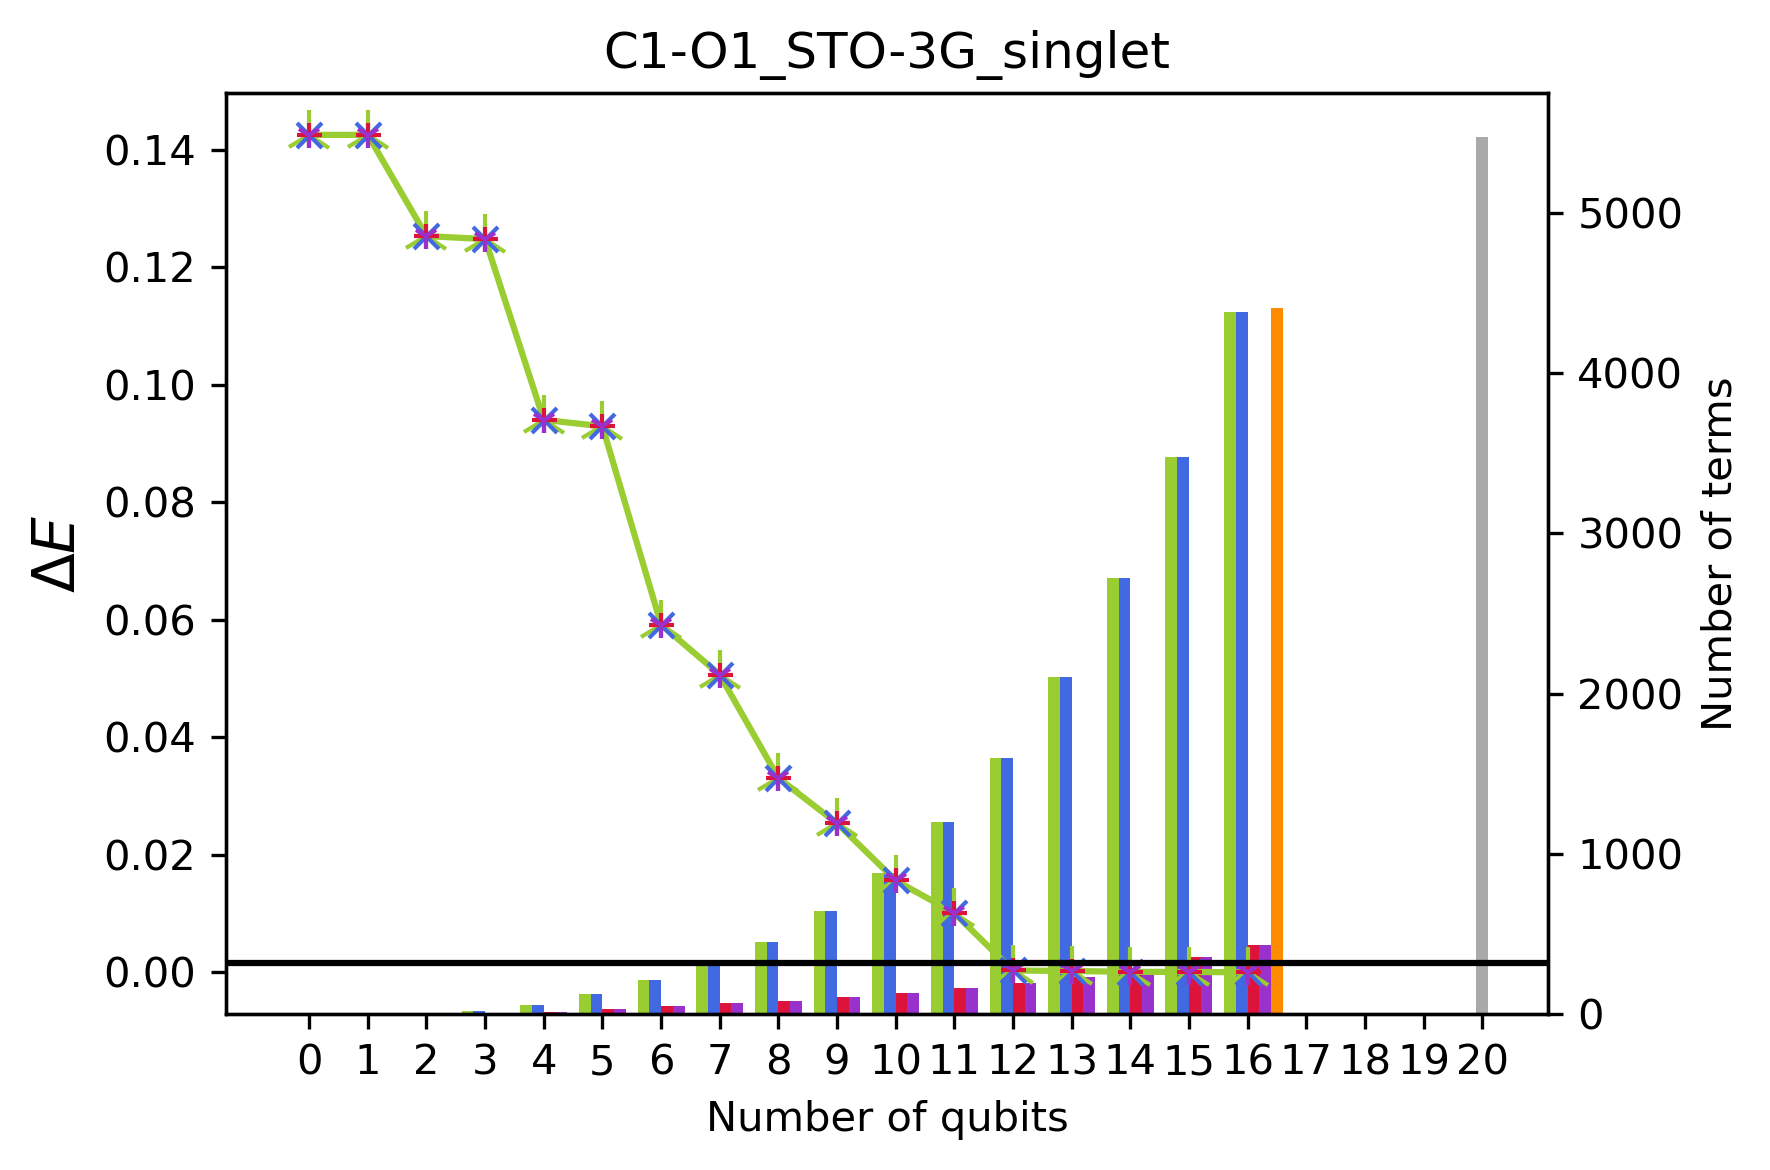

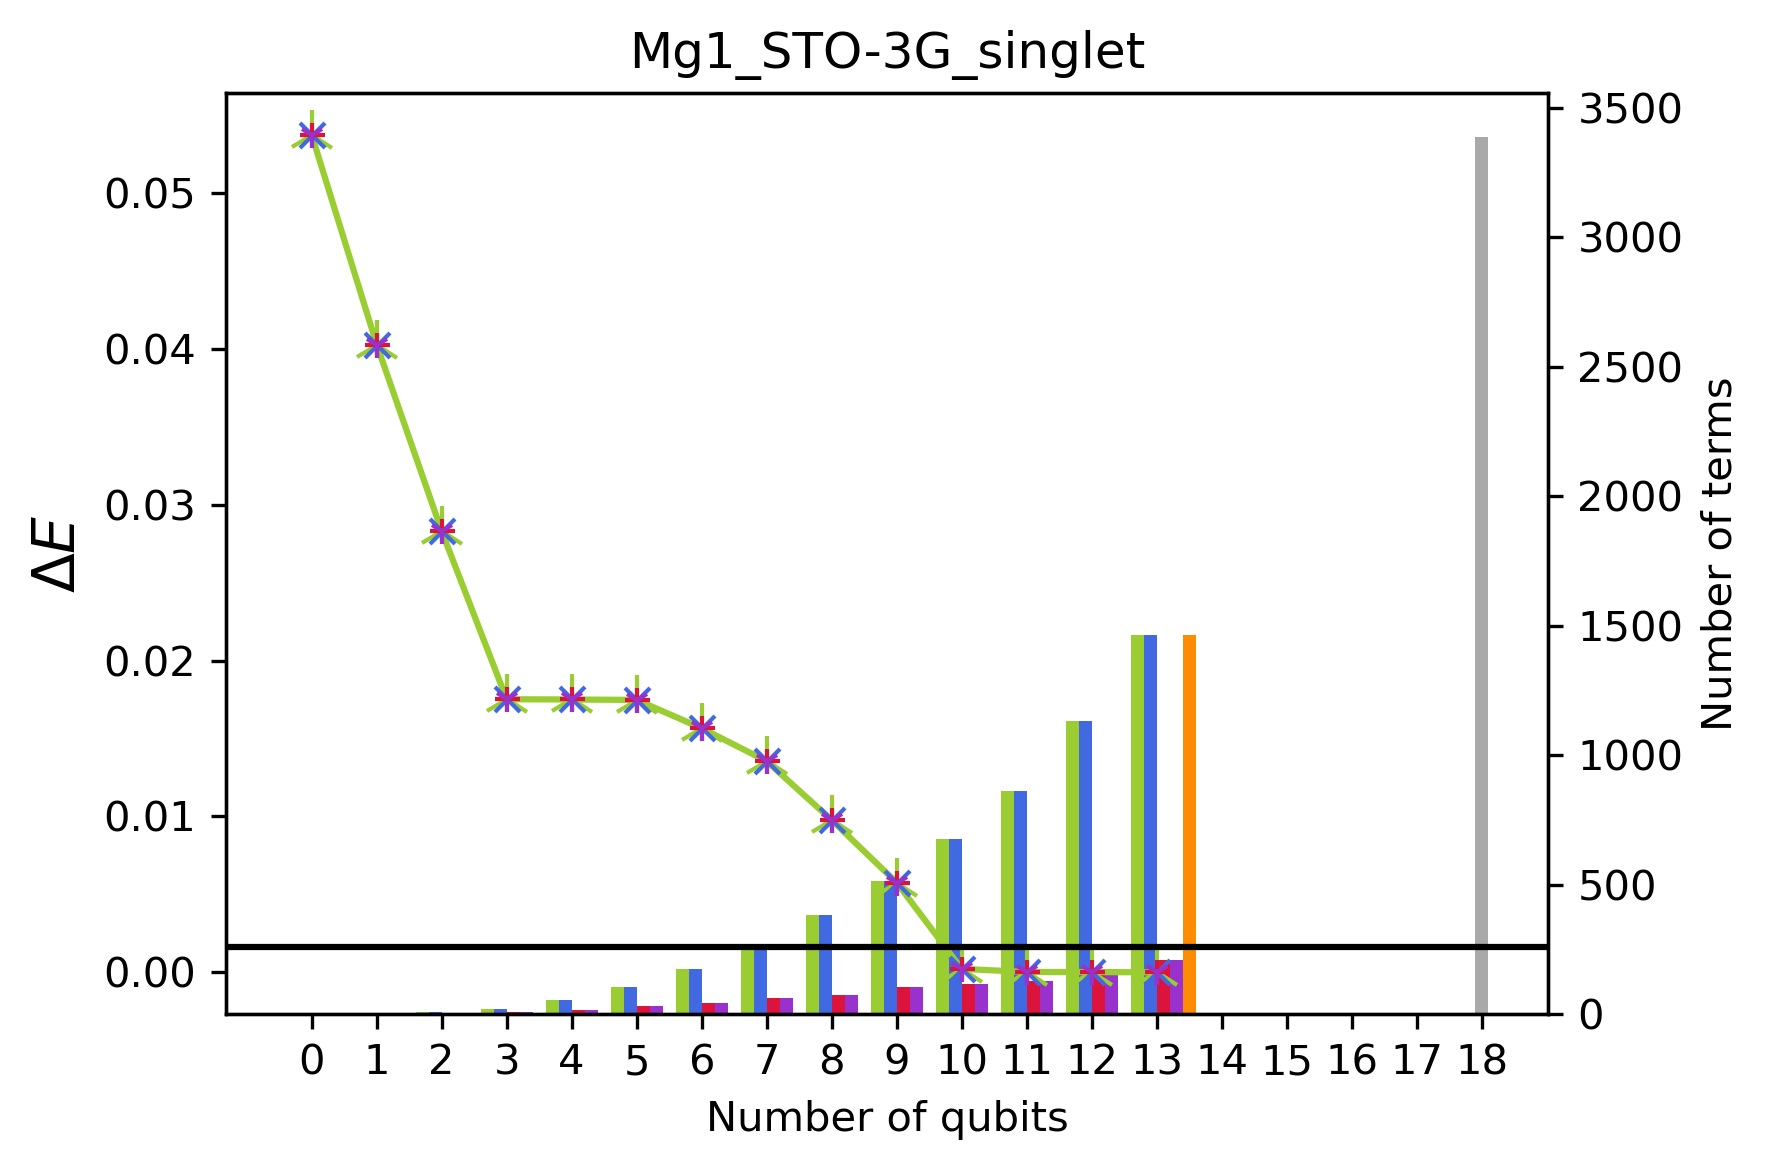

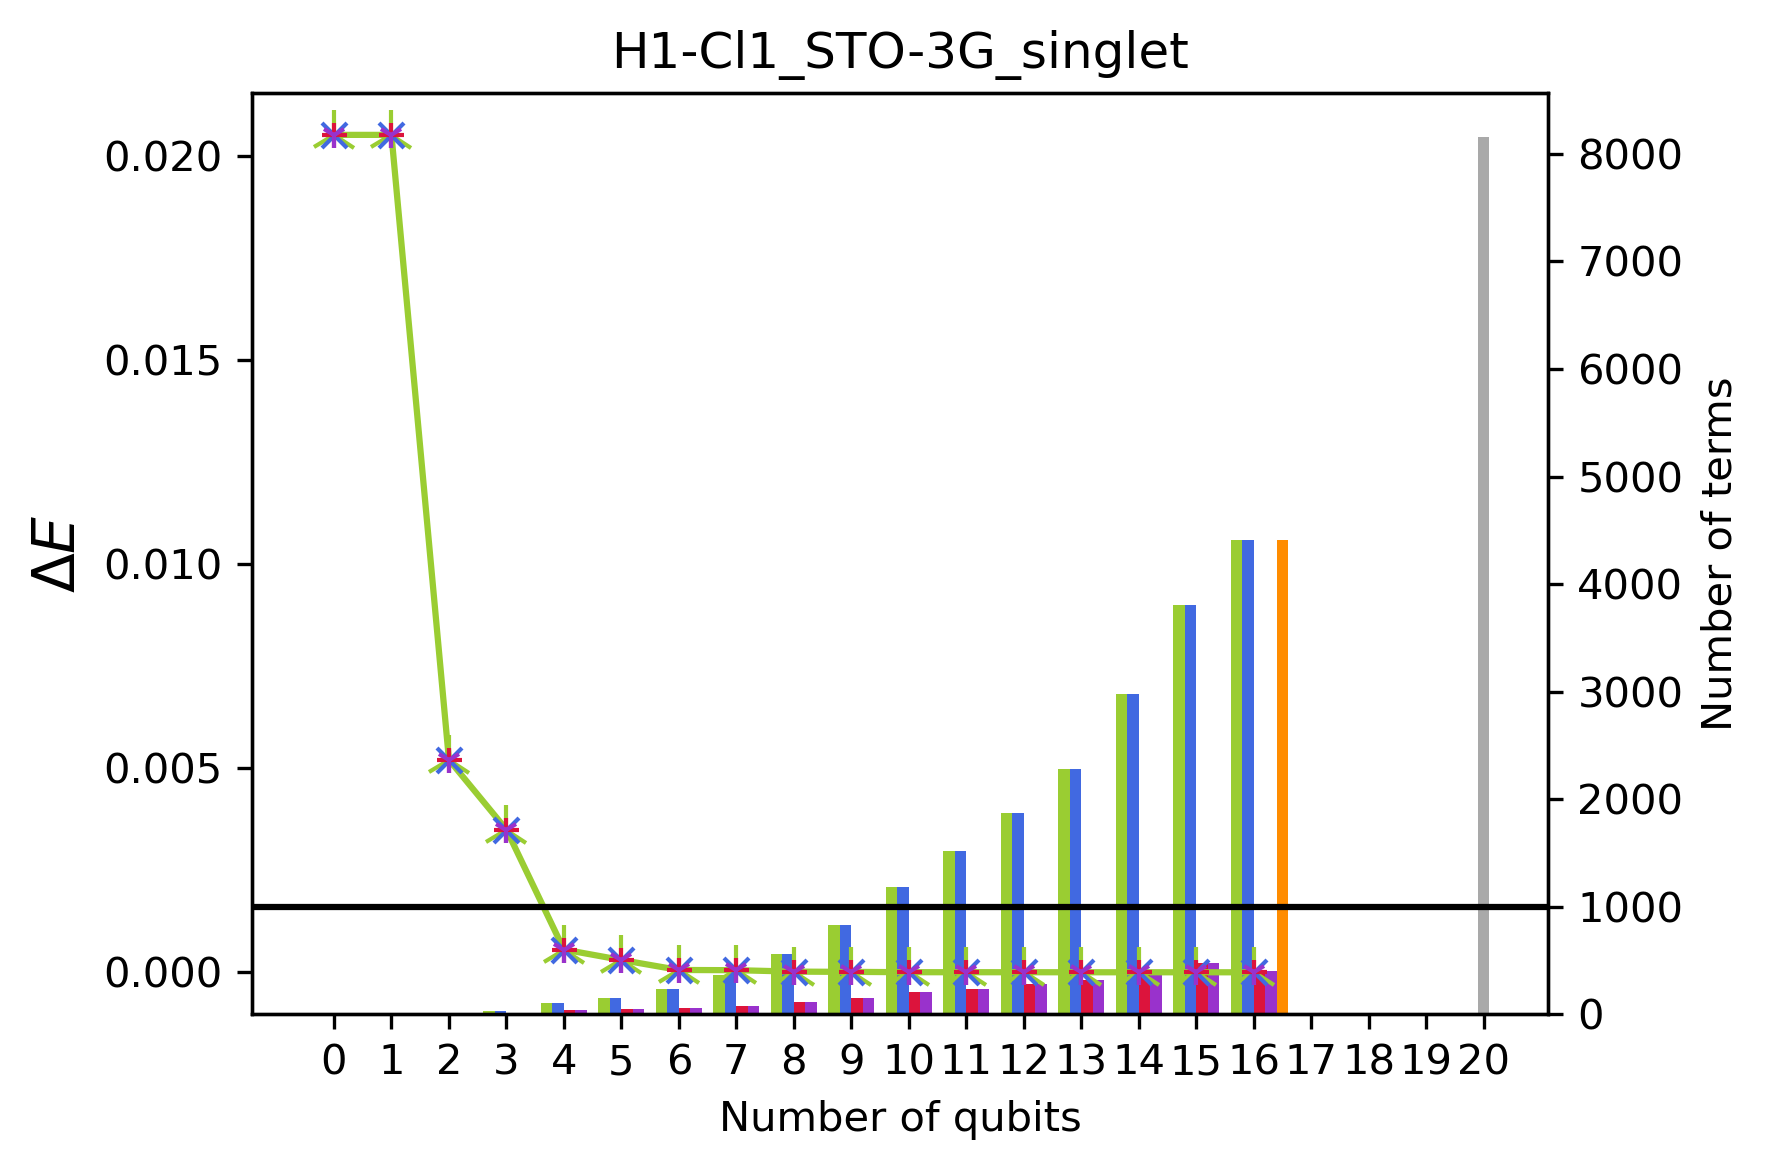

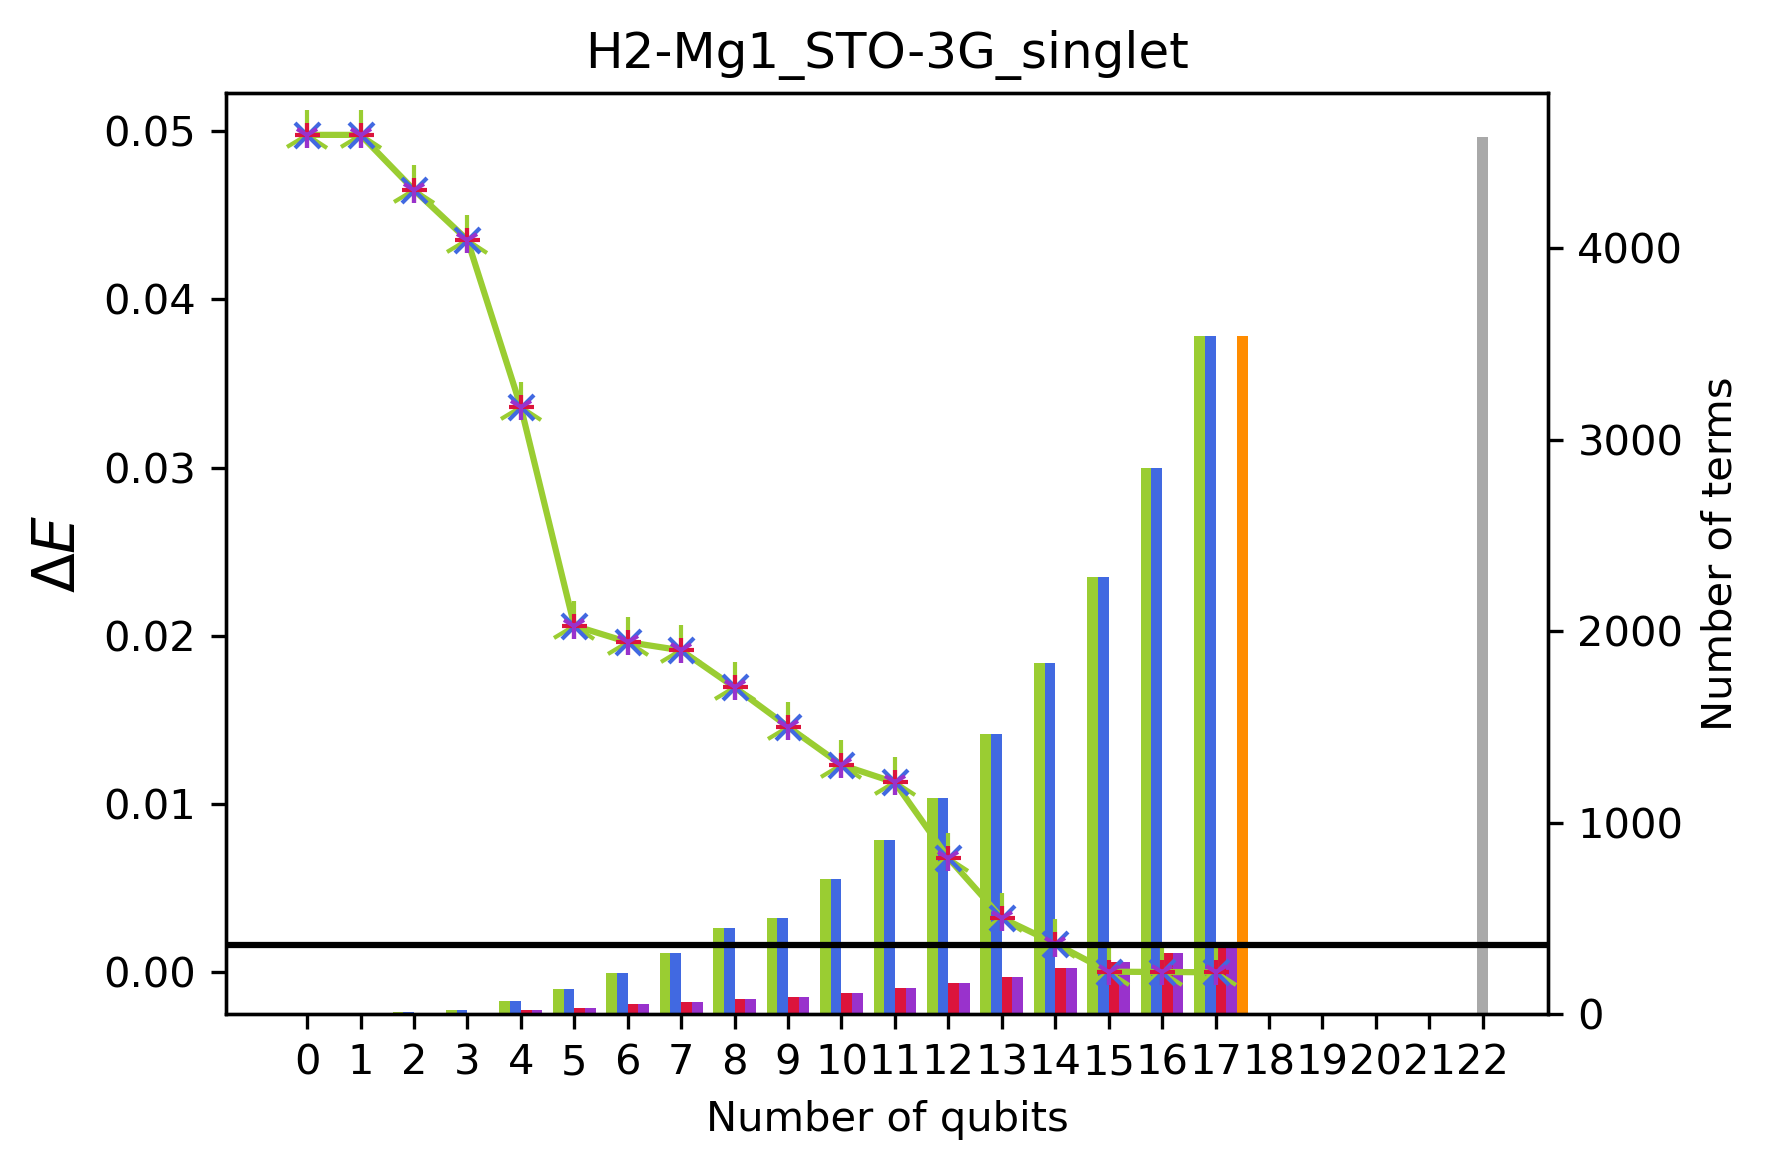

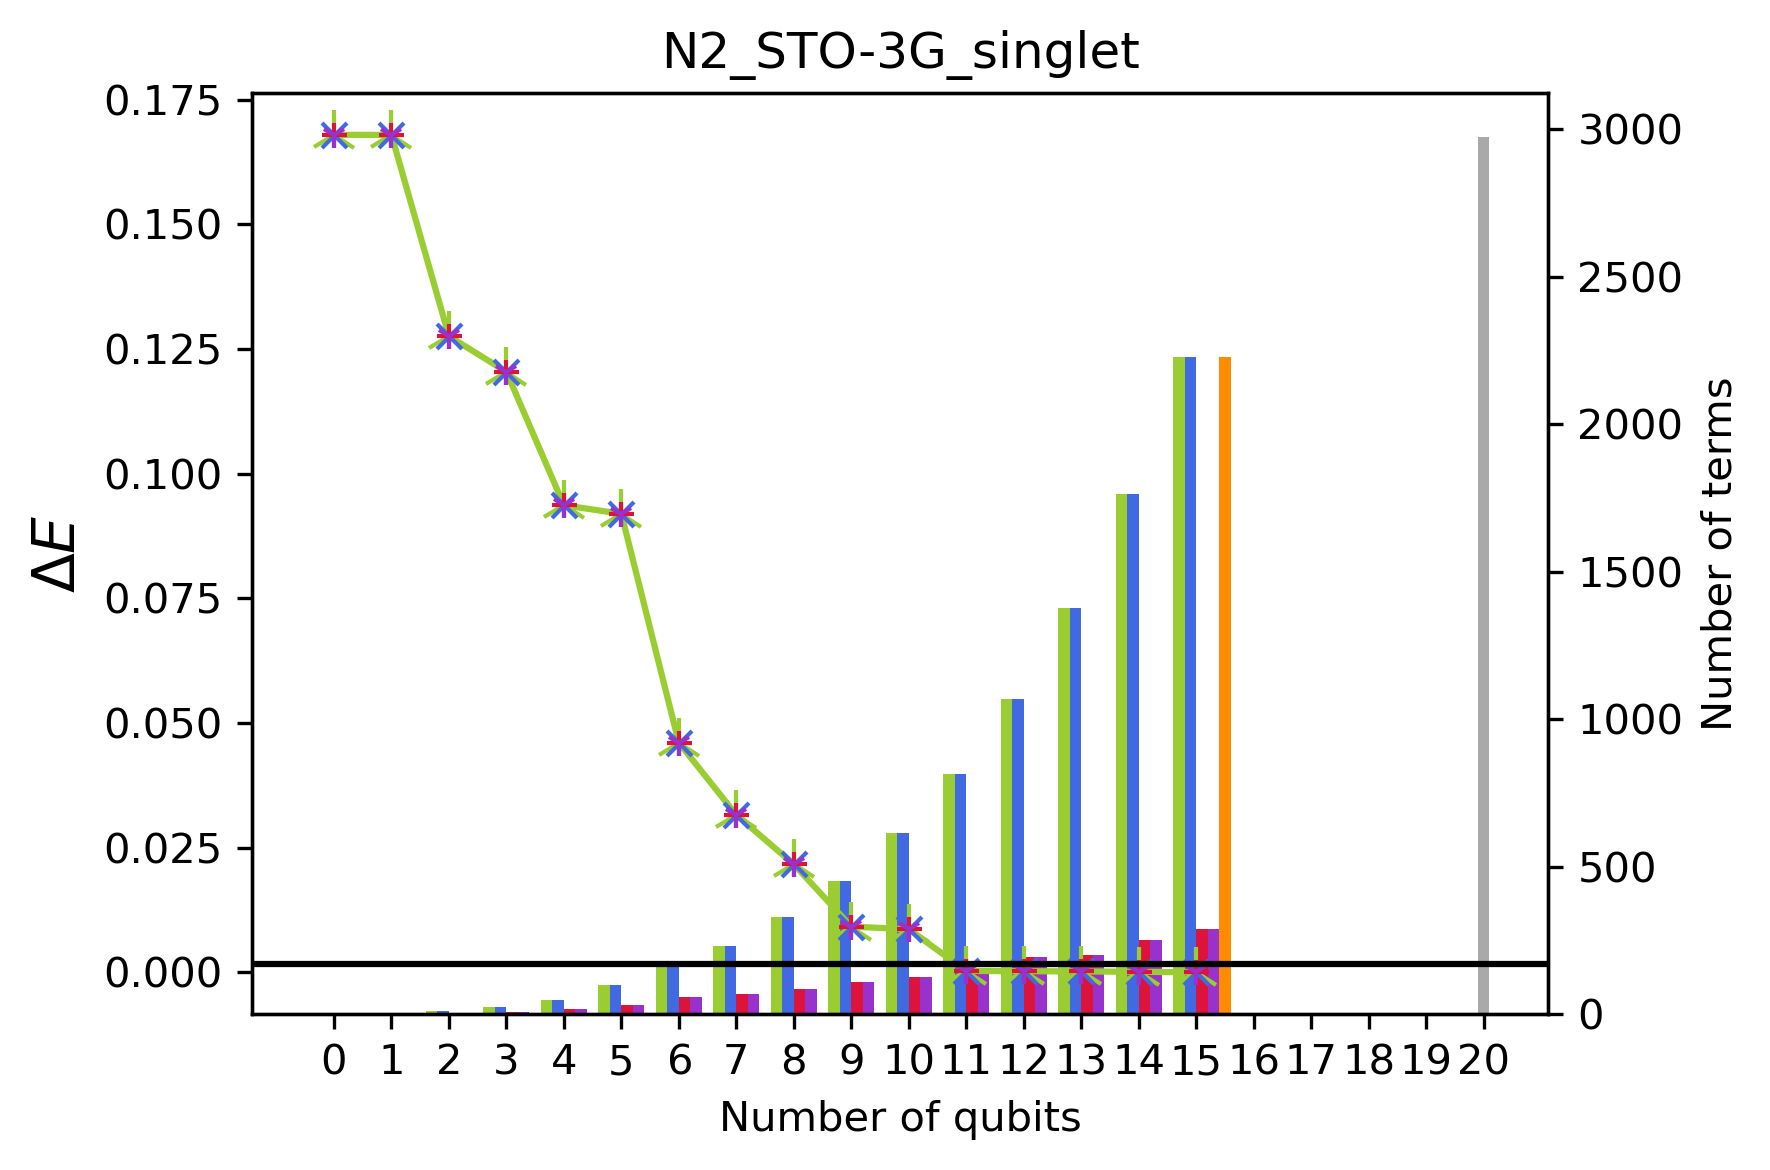

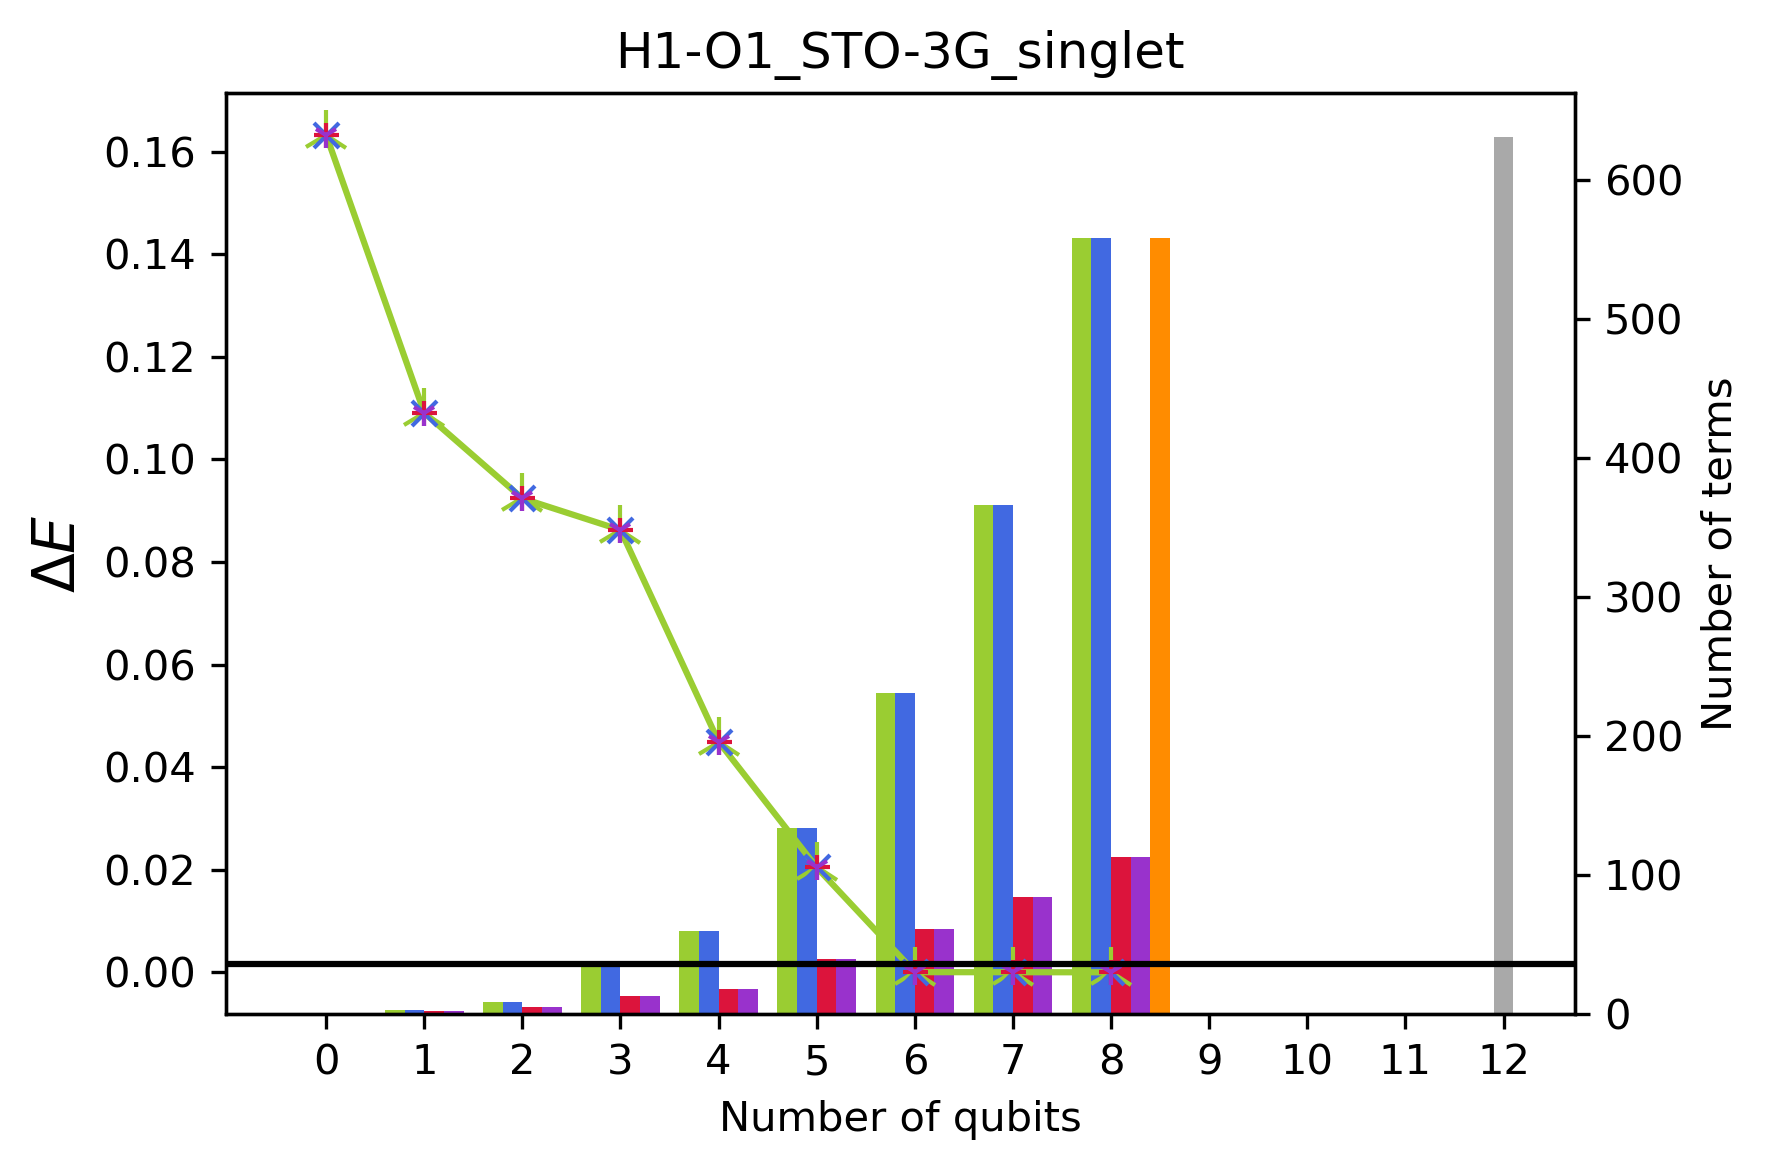

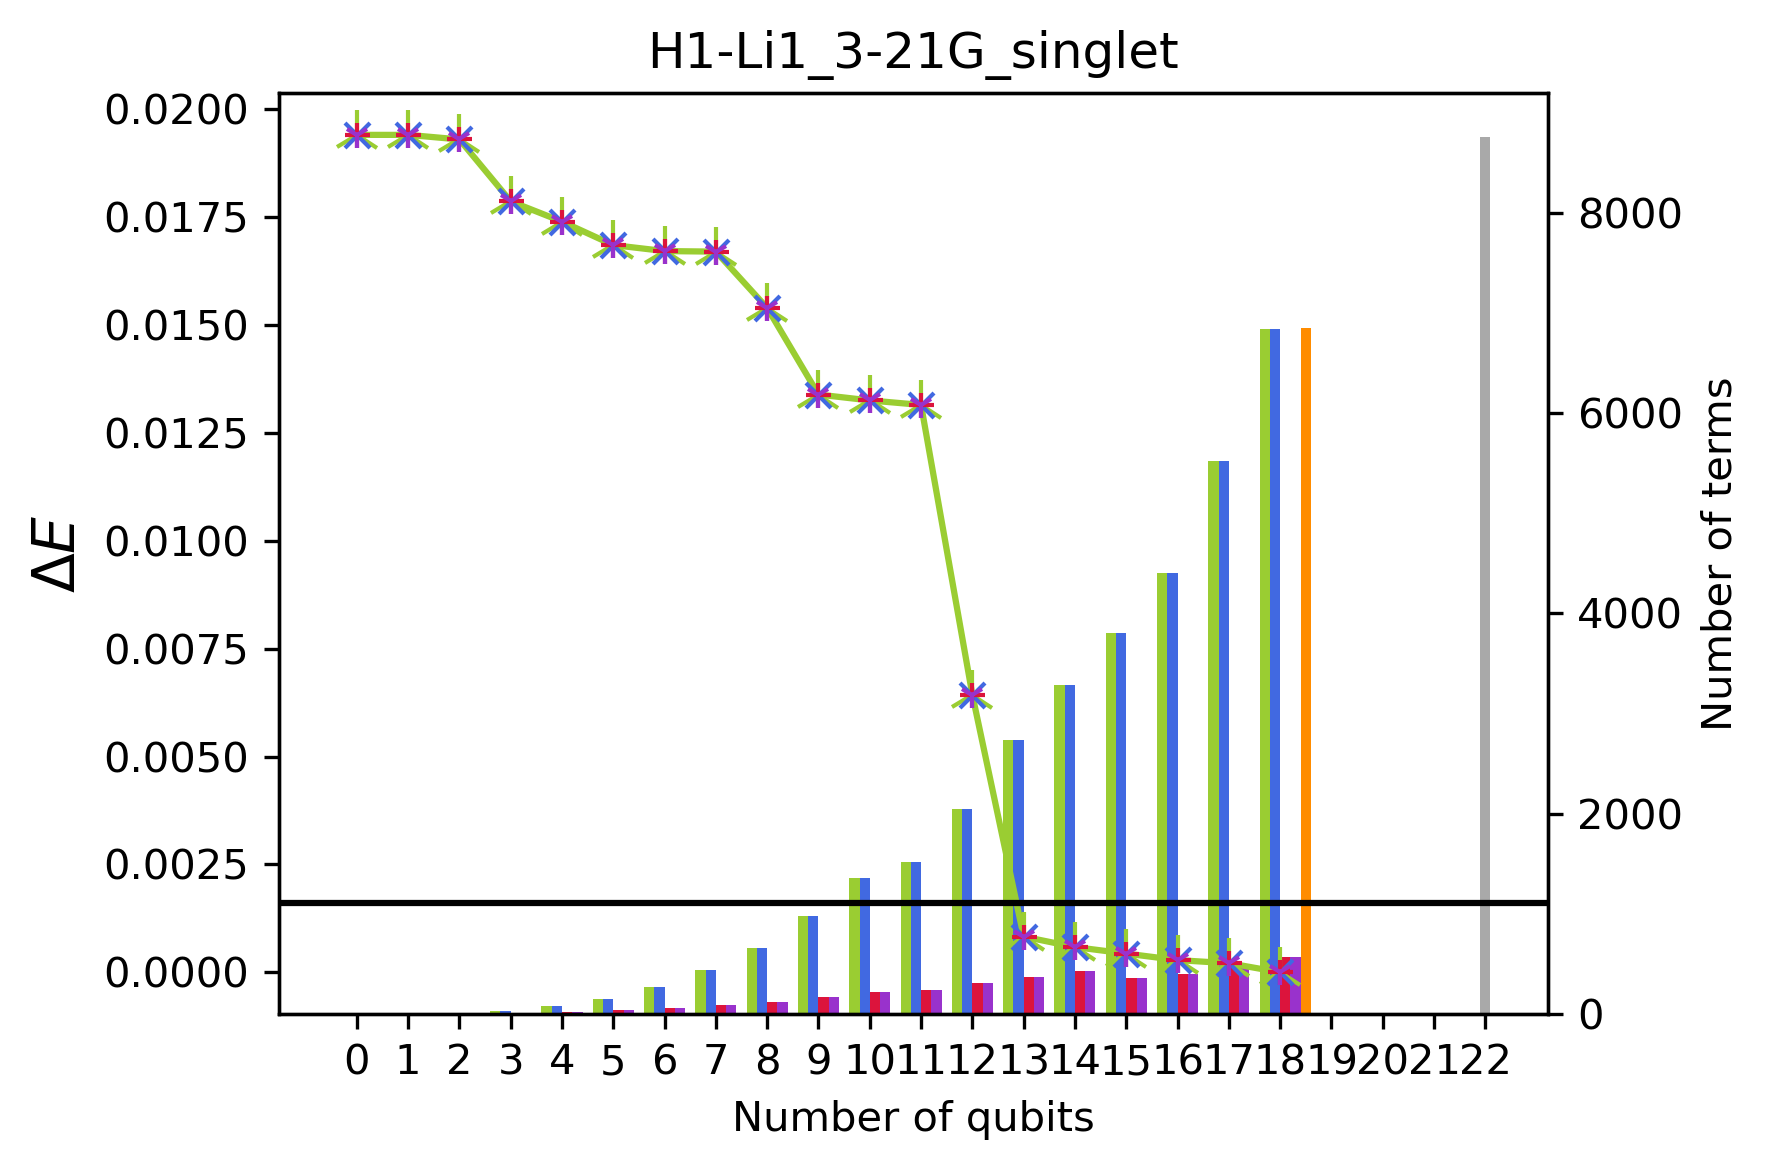

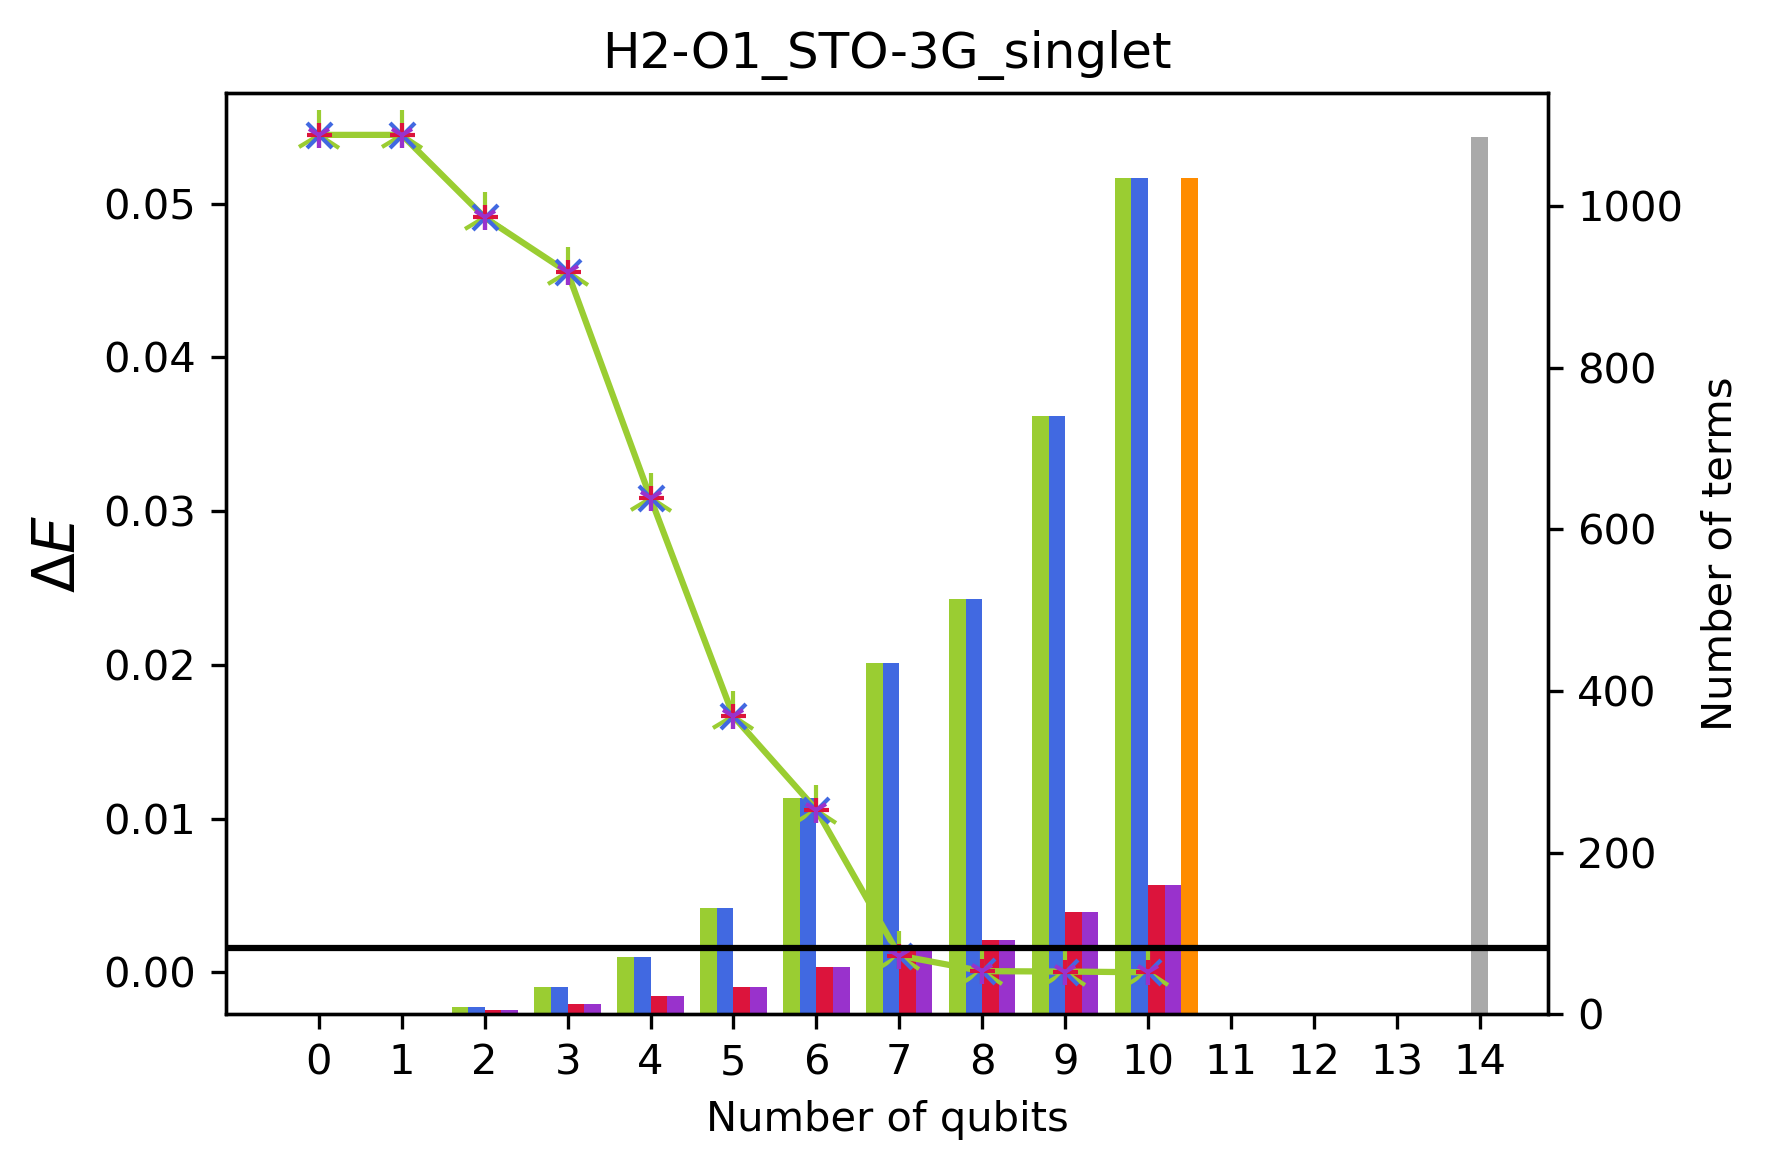

In [70]:
for molecule in myriad_UP_SeqRot_on_CSVQE_SeqRot.keys():
    plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                       tapered_H_size_qubits, 
                       myriad_CS_VQE_LCU_results,
                       myriad_CS_VQE_SeqRot_results,
                       myriad_UP_LCU_on_CSVQE_LCU,
                       myriad_UP_SeqRot_on_CSVQE_SeqRot,
                       molecule,
                       dpi=300)

In [50]:
import pandas as pd
from copy import deepcopy

In [53]:
data = {'molecule': [], 
        'No. qubits': [], 
        'No. terms CS-VQE LCU':[],
        'No. terms CS-VQE SeqRot':[],
        'No. terms CS-VQE LCU and LCU UP':[],
        'No. terms CS-VQE SeqRot and SeqRot UP':[],
        'Original No. qubits tapered H':[],
        'Original No. terms tapered H':[]
       }

for mol_name in myriad_UP_SeqRot_on_CSVQE_SeqRot.keys():
    
    True_gs_energy = myriad_CS_VQE_LCU_results[mol_name]['exp_conditions']['true_gs']
    
    # SeqRot UP ontop CSVQE
    for ind in sorted(myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name].keys()): 
        UP_SeqRot_E = myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name][ind]['E']
        if np.abs(True_gs_energy-UP_SeqRot_E)<=1.6e-3:
            SeqRot_UP_ind = deepcopy(ind)
            break

    # LCU UP ontop CSVQE
    for ind in sorted(myriad_UP_LCU_on_CSVQE_LCU[mol_name].keys()): 
        UP_LCU_E = myriad_UP_LCU_on_CSVQE_LCU[mol_name][ind]['E']
        if np.abs(True_gs_energy-UP_LCU_E)<=1.6e-3:
            LCU_UP_ind = deepcopy(ind)
            break
            
        
    # CSVQE only - LCU script A
    for ind in sorted([ind for key in myriad_CS_VQE_LCU_results[mol_name].keys() if isinstance(ind, int)]):
        CSVQE_LCU_E = myriad_CS_VQE_LCU_results[mol_name][ind]['E']
        if np.abs(True_gs_energy-CSVQE_LCU_E)<=1.6e-3:
            LCU_CSVQE_ind = deepcopy(ind)
            break
    
    # CSVQE only - SeqRot script A
    for ind in sorted([ind for key in myriad_CS_VQE_SeqRot_results[mol_name].keys() if isinstance(ind, int)]):
        CSVQE_SeqRot_E = myriad_CS_VQE_SeqRot_results[mol_name][ind]['E']
        if np.abs(True_gs_energy-CSVQE_SeqRot_E)<=1.6e-3:
            SeqRot_CSVQE_ind = deepcopy(ind)
            break
            
    if not (SeqRot_UP_ind==LCU_UP_ind==LCU_CSVQE_ind==SeqRot_CSVQE_ind):
        raise ValueError('different result for different methods! Something likely wrong')
        
    UP_SeqRot_terms = len(myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name][SeqRot_UP_ind]['AC_sets'])
    UP_LCU_terms = len(myriad_UP_LCU_on_CSVQE_LCU[mol_name][LCU_UP_ind]['AC_sets'])
    CSVQE_LCU_terms = len(myriad_CS_VQE_LCU_results[mol_name][LCU_CSVQE_ind]['H'])
    CSVQE_SeqRot_terms = len(myriad_CS_VQE_SeqRot_results[mol_name][SeqRot_CSVQE_ind]['H'])
    n_qubits = len(list(myriad_CS_VQE_LCU_results[mol_name][LCU_CSVQE_ind]['H'].keys())[0])
    
    tapered_n_qbits = tapered_H_size_qubits[mol_name]['n_qubits']
    tapered_n_terms = tapered_H_size_qubits[mol_name]['n_terms']
    
    data['molecule'].append(mol_name)
    
    # tapered
    data['Original No. qubits tapered H'].append(tapered_n_qbits)
    data['Original No. terms tapered H'].append(tapered_n_terms)
    
    # CS_VQE
    data['No. qubits'].append(n_qubits)
    data['No. terms CS-VQE LCU'].append(CSVQE_LCU_terms)
    data['No. terms CS-VQE SeqRot'].append(CSVQE_SeqRot_terms)
    
    # CS_VQE + UP
    data['No. terms CS-VQE LCU and LCU UP'].append(UP_LCU_terms)
    data['No. terms CS-VQE SeqRot and SeqRot UP'].append(UP_SeqRot_terms)

    

In [ ]:
# mol_name = 'H2-O1_STO-3G_singlet'
# ind=7

# CSVQE_LCU_E = myriad_CS_VQE_LCU_results[mol_name][ind]['E']
# True_gs_energy = myriad_CS_VQE_LCU_results[mol_name]['exp_conditions']['true_gs']
# np.abs(CSVQE_LCU_E-True_gs_energy)

# Results

- number of qubits required to acheive chemical accuracy
- with number of terms in Hamiltonian
    - either with only CS-VQE applied
    - or with CS-VQE applied then unitary partitioning ontop

In [59]:
df = pd.DataFrame(data=data)
df

,molecule,No. qubits,No. terms CS-VQE LCU,No. terms CS-VQE SeqRot,No. terms CS-VQE LCU and LCU UP,No. terms CS-VQE SeqRot and SeqRot UP,Original No. qubits tapered H,Original No. terms tapered H
0,H2-Be1_STO-3G_singlet,7,268,268,61,61,9,596
1,H1-F1_STO-3G_singlet,4,100,100,34,34,8,558
2,H3-N1_STO-3G_singlet,11,1373,1373,181,182,13,3048
3,F2_STO-3G_singlet,9,527,527,99,99,15,2229
4,Be1_STO-3G_singlet,3,20,20,9,9,5,102
5,H1-F1_3-21G_singlet,17,5530,5530,469,469,18,6852
6,H3_STO-3G_singlet_1+,1,3,3,2,2,3,34
7,H4-N1_STO-3G_singlet_1+,12,1359,1359,190,190,14,2194
8,H1-Na1_STO-3G_singlet,14,2722,2722,273,273,16,4409
9,O2_STO-3G_singlet,11,815,815,157,157,15,2229


In [ ]:
len('lrrrrrrr')

In [ ]:
print(df.to_latex(index=False, column_format='cccccccc', multirow=True))

In [ ]:
# calc still running on supercomputer! 
mol = 'H3-N1_STO-3G_singlet'#'H2-O1_STO-3G_singlet'
plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                       tapered_H_size_qubits, 
                       myriad_CS_VQE_LCU_results,
                       myriad_CS_VQE_SeqRot_results,
                       myriad_UP_LCU_on_CSVQE_LCU,
                       myriad_UP_SeqRot_on_CSVQE_SeqRot,
                        mol,
                       dpi=300)

In [ ]:
# mol = 'H1-F1_3-21G_singlet'
res = myriad_UP_LCU_on_CSVQE_LCU[mol]
res2= myriad_UP_SeqRot_on_CSVQE_SeqRot[mol]
True_gs_energy = myriad_CS_VQE_LCU_results[mol]['exp_conditions']['true_gs']

In [ ]:
True_gs_energy

In [ ]:
abs(res[11]['E']-True_gs_energy)#<1.6e-3

In [ ]:
res2.keys()

In [ ]:
abs(res2[11]['E']-True_gs_energy)<1.6e-3

In [ ]:
myriad_UP_SeqRot_on_CSVQE_SeqRot['H3-N1_STO-3G_singlet'].keys()

In [ ]:
myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet']['exp_conditions']['removal_order']

In [ ]:
myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet']['exp_conditions']['removal_order']

In [ ]:
myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions']['model_CSVQE'][1]

In [ ]:
len(myriad_UP_LCU_on_CSVQE_LCU['H3-N1_STO-3G_singlet'][11]['AC_sets'])

In [ ]:
len(myriad_UP_SeqRot_on_CSVQE_SeqRot['H3-N1_STO-3G_singlet'][11]['AC_sets'])

In [ ]:
from functools import reduce
SEQ = reduce(lambda x, y: x+y, myriad_UP_SeqRot_on_CSVQE_SeqRot['H3-N1_STO-3G_singlet'][11]['AC_sets'].values())
SEQ = reduce(lambda x, y: x+y, SEQ)

LCU = reduce(lambda x, y: x+y, list(myriad_UP_LCU_on_CSVQE_LCU['H3-N1_STO-3G_singlet'][11]['AC_sets'].values()))
LCU = reduce(lambda x, y: x+y, LCU)

In [ ]:
SEQ == LCU

In [ ]:
xx = sorted([list(term.terms.keys())[0] for term in LCU])
yy = sorted([list(term.terms.keys())[0] for term in SEQ])

xx == yy

In [ ]:
HH1_mat = qubit_operator_sparse(LCU)
HH2_mat = qubit_operator_sparse(SEQ)
sparse_allclose(HH1_mat, HH2_mat)

In [ ]:
myriad_UP_SeqRot_on_CSVQE_SeqRot['H1-He1_3-21G_singlet_1+'][1]['AC_sets']

In [ ]:
myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions'].keys()
model = myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions']['model_CSVQE']
fn_form =  myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions']['fn_form_CSVQE']
ground_state_params = myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions']['gstate_noncon']

In [ ]:
Rotations_list, diagonalized_generators_GuA, eigen_vals_nonC_ground_state_GuA_ops = diagonalize_epistemic(model,
                                                                                                            fn_form,
                                                                                                            ground_state_params)

In [ ]:
diagonalized_generators_GuA[-1]

In [ ]:
import quchem.Misc_functions.conversion_scripts as conv_scr 
from openfermion import qubit_operator_sparse

In [ ]:
HH1 = conv_scr.Get_Openfermion_Hamiltonian(myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet'][11]['H'])
HH2 = conv_scr.Get_Openfermion_Hamiltonian(myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet'][11]['H'])

HH1_mat = qubit_operator_sparse(HH1)
HH2_mat = qubit_operator_sparse(HH2)

In [ ]:
# len(myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet'][11]['H'])
len(myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet'][11]['H'])

In [ ]:
from quchem.Misc_functions.Misc_functions import sparse_allclose
sparse_allclose(HH1_mat, HH2_mat)

In [ ]:
x, y = np.where(HH1_mat.todense()!= HH2_mat.todense())

In [ ]:
x

In [ ]:
HH1_mat[0,1]

In [ ]:
Threshold = 1e-7
newH1 = {P: coeff for P, coeff in myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet'][9]['H'].items() if np.abs(coeff)>Threshold}
newH2 = {P: coeff for P, coeff in myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet'][9]['H'].items() if np.abs(coeff)>Threshold}

In [ ]:
newH1.keys() == newH2.keys()

In [ ]:
HH1 = conv_scr.Get_Openfermion_Hamiltonian(newH1)
HH2 = conv_scr.Get_Openfermion_Hamiltonian(newH2)

HH1_mat = qubit_operator_sparse(HH1)
HH2_mat = qubit_operator_sparse(HH2)
sparse_allclose(HH1_mat, HH2_mat)

In [ ]:
x, y = np.where(HH1_mat.todense()!= HH2_mat.todense())

In [ ]:
for x1, y1 in zip(x,y):
    if not np.isclose(HH1_mat[x1, y1], HH2_mat[x1, y1]):
        print(HH1_mat[x1, y1]-HH2_mat[x1, y1])

In [ ]:
len(newH2)